In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import seaborn as sns
import warnings

warnings.filterwarnings("ignore")

In [ ]:
df_loaded = pd.read_parquet("data_google_playstore_cleaned.parquet", engine="pyarrow")

In [ ]:
🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷

# EXPLORATORY DATA ANALYSIS
## 1. Handling duplicate App
The approach taken here is to create a dataset containing only duplicate apps with differing metadata.
This strategy is intended to simplify operations by isolating the duplicates from the rest of the dataset.

The ultimate goal is to transform the App column into a primary key. Naturally, the process accounts for edge cases where duplicate entries are not errors, but rather distinct records that should be preserved.  It could be the case that two apps with the same name represent different versions of the same app, or even entirely different apps. Only further consideration and assumptions can shed light on this possibility!  

To maintain the integrity of the primary key without discarding these valid variations, some duplicate apps with differing metadata will be renamed by appending a numerical suffix to their name.

***
  
**Disclaimer**  
This analysis might appear excessive, given that the explanation for most discrepancies in metadata across identical app names lies in data entry errors or issues at the source of data collection.  
Additionally, as this is a portfolio project, there is no clearly defined objective beyond conducting a general data analysis. For this reason, a more targeted or goal-specific approach would not have been feasible.

Nevertheless, the analysis serves as a valuable exercise to practice and demonstrate logical reasoning, statistical insight, and coding proficiency — while also ensuring the integrity of the dataset is preserved.

### 1.1 Creation of the new dataset with only rows for duplicate apps 
In this section, alongside the creation of the new dataset, a consistency check is performed to ensure it was generated as intended. A preliminary exploration of the dataset is also conducted—partially addressed earlier during the data cleaning phase when handling duplicates.

To support evaluation and further analysis, it is useful to identify which features vary across duplicate app entries. This includes calculating, for each feature, the percentage of apps that contain differing values within their duplicate group—providing a clear overview of feature-level inconsistency across the dataset

In [229]:
df_copy2 = df_copy[df_copy['App'].duplicated(keep = False)]

print(f"\n\033[91mNumber of rows in the new dataset - including first instance:\033[0m\n {df_copy2.shape[0]}")
print(f"\n\033[91mNumber of rows in the new dataset - excluding first instance:\033[0m\n {df_copy2['App'].duplicated().sum()}")

print(f"\n\033[91mTotal number of duplicate rows by App in the original dataset - including first instance:\033[0m\n {df_copy['App'].duplicated(keep = False).sum()}")
print(f"\n\033[91mTotal number of duplicate rows by App in the original dataset - excluding first instance:\033[0m\n {df_copy['App'].duplicated().sum()}")

print(f"\n\033[91mTotal number of rows per columns in the original dataset:\033[0m\n {df_copy.shape[0]}")


Number of rows in the new dataset - including first instance:
 1221

Number of rows in the new dataset - excluding first instance:
 698

Total number of duplicate rows by App in the original dataset - including first instance:
 1221

Total number of duplicate rows by App in the original dataset - excluding first instance:
 698

Total number of rows per columns in the original dataset:
 10346


In [231]:
print("\n\033[91mCount of duplicate apps with different metadata:\033[0m\n")
df_copy[df_copy['App'].duplicated(keep = False)]['App'].value_counts()


Count of duplicate apps with different metadata:



App
ROBLOX                                           9
8 Ball Pool                                      7
Helix Jump                                       6
Zombie Catchers                                  6
Bubble Shooter                                   6
                                                ..
Nike Training Club - Workouts & Fitness Plans    2
Weight Loss Running by Verv                      2
Run with Map My Run                              2
Endomondo - Running & Walking                    2
Maps & GPS Navigation — OsmAnd                   2
Name: count, Length: 523, dtype: int64

In [233]:
# Exploring the new dataset
df_copy2[df_copy2['App'].duplicated(keep = False)].sort_values(by = 'App').head(10)

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver,Date,Month,Year,Major,Minor,Patch,Size_original
5415,365Scores - Live Scores,SPORTS,4.6,666246,25000000.0,10000000,Free,0.0,Everyone,Sports,2018-07-29,559,4.1 and up,29,7,2018,559,NaN,NaN,25M
3083,365Scores - Live Scores,SPORTS,4.6,666521,25000000.0,10000000,Free,0.0,Everyone,Sports,2018-07-29,559,4.1 and up,29,7,2018,559,NaN,NaN,25M
1755,8 Ball Pool,GAME,4.5,14200344,52000000.0,100000000,Free,0.0,Everyone,Sports,2018-07-31,400,4.0.3 and up,31,7,2018,400,NaN,NaN,52M
1703,8 Ball Pool,GAME,4.5,14198602,52000000.0,100000000,Free,0.0,Everyone,Sports,2018-07-31,400,4.0.3 and up,31,7,2018,400,NaN,NaN,52M
1871,8 Ball Pool,GAME,4.5,14201891,52000000.0,100000000,Free,0.0,Everyone,Sports,2018-07-31,400,4.0.3 and up,31,7,2018,400,NaN,NaN,52M
1844,8 Ball Pool,GAME,4.5,14200550,52000000.0,100000000,Free,0.0,Everyone,Sports,2018-07-31,400,4.0.3 and up,31,7,2018,400,NaN,NaN,52M
1675,8 Ball Pool,GAME,4.5,14198297,52000000.0,100000000,Free,0.0,Everyone,Sports,2018-07-31,400,4.0.3 and up,31,7,2018,400,NaN,NaN,52M
1970,8 Ball Pool,GAME,4.5,14201604,52000000.0,100000000,Free,0.0,Everyone,Sports,2018-07-31,400,4.0.3 and up,31,7,2018,400,NaN,NaN,52M
3953,8 Ball Pool,SPORTS,4.5,14184910,52000000.0,100000000,Free,0.0,Everyone,Sports,2018-07-31,400,4.0.3 and up,31,7,2018,400,NaN,NaN,52M
559,95Live -SG#1 Live Streaming App,DATING,4.1,4953,15000000.0,1000000,Free,0.0,Teen,Dating,2018-08-01,872,4.2 and up,1,8,2018,872,NaN,NaN,15M


In [235]:
# Exploring duplicate apps within a range of occurency of duplicates
app_counts = df_copy['App'].value_counts()
df_copy[df_copy['App'].isin(app_counts[(app_counts > 3) & (app_counts < 6)].index)].sort_values(by='App').head(10)

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver,Date,Month,Year,Major,Minor,Patch,Size_original
2790,"AliExpress - Smarter Shopping, Better Living",SHOPPING,4.6,5917485,NaN,100000000,Free,0.0,Teen,Shopping,2018-08-06,Varies with device,Varies with device,6,8,2018,Varies with device,NaN,NaN,Varies with device
4099,"AliExpress - Smarter Shopping, Better Living",SHOPPING,4.6,5911055,NaN,100000000,Free,0.0,Teen,Shopping,2018-08-01,Varies with device,Varies with device,1,8,2018,Varies with device,NaN,NaN,Varies with device
2756,"AliExpress - Smarter Shopping, Better Living",SHOPPING,4.6,5916569,NaN,100000000,Free,0.0,Teen,Shopping,2018-08-06,Varies with device,Varies with device,6,8,2018,Varies with device,NaN,NaN,Varies with device
2660,"AliExpress - Smarter Shopping, Better Living",SHOPPING,4.6,5916606,NaN,100000000,Free,0.0,Teen,Shopping,2018-08-06,Varies with device,Varies with device,6,8,2018,Varies with device,NaN,NaN,Varies with device
1905,Angry Birds Classic,GAME,4.4,5566889,97000000.0,100000000,Free,0.0,Everyone,Arcade,2018-05-24,793,4.1 and up,24,5,2018,793,NaN,NaN,97M
3883,Angry Birds Classic,GAME,4.4,5565856,97000000.0,100000000,Free,0.0,Everyone,Arcade,2018-05-24,793,4.1 and up,24,5,2018,793,NaN,NaN,97M
1740,Angry Birds Classic,GAME,4.4,5566805,97000000.0,100000000,Free,0.0,Everyone,Arcade,2018-05-24,793,4.1 and up,24,5,2018,793,NaN,NaN,97M
1680,Angry Birds Classic,GAME,4.4,5566669,97000000.0,100000000,Free,0.0,Everyone,Arcade,2018-05-24,793,4.1 and up,24,5,2018,793,NaN,NaN,97M
1990,Angry Birds Classic,GAME,4.4,5566908,97000000.0,100000000,Free,0.0,Everyone,Arcade,2018-05-24,793,4.1 and up,24,5,2018,793,NaN,NaN,97M
4869,Angry Birds Rio,GAME,4.4,2610328,46000000.0,100000000,Free,0.0,Everyone,Arcade,2018-07-03,269,4.1 and up,3,7,2018,269,NaN,NaN,46M


#### NOTE - .isin()


#### NOTE - .index

In [238]:
# Individuating features that have distinct records within duplicate apps as max number of distinct records
features=['App', 'Date', 'Month', 'Year', 'Major', 'Minor', 'Patch']

print('\033[91mMax number of distinct values per each app group\033[0m')
for col in df_copy2:
    if col not in features and df_copy2.groupby('App')[col].nunique().max()>1:
        print(f"\n\033[91m{col}\033[0m:", df_copy2.groupby('App')[col].nunique().max())

Max number of distinct values per each app group

Category: 2

Rating: 2

Reviews: 8

Size: 3

Installs: 2

Type: 2

Price: 2

Genres: 3

Last Updated: 3

Current Ver: 3

Android Ver: 2

Size_original: 3


In [240]:
print('\n\033[91mPercentage of Apps with Variation per Feature\033[0m')
for col in df_copy2:
    if col not in features:
        sum_var = (df_copy2.groupby('App')[col].nunique() > 1).sum()
        print(f"\n\033[91m{col}:\033[0m {round((sum_var / df_copy2['App'].nunique()) * 100, 2)}%")


Percentage of Apps with Variation per Feature

Category: 16.25%

Rating: 3.25%

Reviews: 98.85%

Size: 2.49%

Installs: 2.87%

Type: 0.38%

Price: 0.38%

Content Rating: 0.0%

Genres: 1.53%

Last Updated: 8.03%

Current Ver: 4.59%

Android Ver: 2.68%

Size_original: 3.25%


### Observations - new dataset
After a brief inspection of the dataset, it becomes evident that every feature shows multiple distinct values in at least one group of duplicate apps. For instance, Reviews stands out with a remarkable 98.85% variation rate — indicating that nearly every group of duplicate entries differs in this feature.

However, it's important to recognize that not all features represent meaningful differences between duplicate app records. Some variations may be based on dynamic data, technical inconsistencies, or formatting issues rather than actual discrepancies.
This distinction will be addressed at the beginning of the next step.

🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷
🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷
### 1.2 Identifying Discriminant Features
As mentioned, not every feature is relevant in terms of indicating concrete differences among records within the same group of duplicate apps.

The most reasonable approach is to choose, based on domain knowledge, intuition, and common sense. For example, just by quickly looking at the dataset, discrepancies in Category appear to be related to mistakes, as many apps show only one different category across multiple duplicate entries, while other metadata remains identical.  

As a guiding principle, derived from the manual check at the end of the previous section, apps with the same name will be kept as separate records if they differ in key technical features — specifically Current Ver, Price, or Android Ver. These features are assumed to reflect meaningful distinctions between app versions or releases that can be helpful in further analysis regarding versions upgrading.

For this reason, the features kept as discriminants for identifying duplicate apps that might hold distinct and valuable data points are chosen according to the following considerations per feature:
- **Category:** As mentioned, this feature often presents only one differing record among multiple instances of the same duplicate app. In some cases, it's easy to infer that such discrepancies are clearly the result of data collection inaccuracies or incorrect listings from the app developer. One notable case is the app Calculator, which appears under both Tools and Dating.
- **Rating:** Most distinct entries for the same duplicate app show only small variations in rating. These could be due to entry errors at different times or may reflect slight differences across versions.
- **Reviews:** Similar to Rating, variations are frequent but likely tied to time-based updates or versioning.
- **Size:** Discrepancies are most likely due to either data collection errors or different versions of the app. The assumption here is that they are derived from version differences.
- **Installs:** Similar to Size.
- **Genres:** Similar to Category, often inconsistent and potentially non-relevant.
- **Last Updated:** This feature typically varies with the app version, so it is considered a derivative of Current Ver and excluded from independent consideration to reduce redundancy.

***

***Selected Discriminant Features***
- **Price:** This section is emphasized because in several cases, apps with the same name and nearly identical metadata were listed with different prices. This seemed unlikely, even when considering different versions, and therefore suggests either entry errors or version-related distinctions.
- **Current Ver:** This is the core of the distinction between different versions of the same app. It was deemed relevant to preserve different versions, as they might hold valuable information about the app's evolution over time or enable specific analysis by version. Moreover, it was observed that when a group of duplicate apps differed in Current Ver, other metadata such as Reviews, Rating, Size, and Installs often differed as well (and in a few cases, even Category or Price).
- **Android Ver:** Although similar to Current Ver, it was considered relevant to use this feature as an additional filter, since it defines the Android engine compatibility, and thus reflects a structural constraint for each app release.

While it would be impossible to inspect each record individually, some approximations will be performed using imputation methods, particularly for features considered irrelevant.

**Note**
To fully understand the reasons behind duplicate apps with different metadata, a cross-check among various features (e.g., Size vs. Current Ver, Category vs. Price) would be ideal. However, this is beyond the scope of the current portfolio project.
The assumptions stated above should provide a sufficient foundation for handling duplicate apps that may, in fact, represent unique entries.

In [244]:
# Individuting the amount of apps with different versions
unique_ver = df_copy2.groupby('App')['Current Ver'].nunique()

different_ver = 0
same_ver = 0

for i in unique_ver:
    
    if i > 1:
        different_ver+=1   
    elif i == 1:
        same_ver+=1
        
print(f"\033[91m\nThe amount of apps with different versions is:\033[0m:{different_ver}")
print(f"\033[91m\nThe amount of apps with the same version is:\033[0m: {same_ver}")


The amount of apps with different versions is::24

The amount of apps with the same version is:: 499


In [246]:
# Manual check about the discrepancies in records for the duplicate app groups
df_copy2[df_copy2['App'].isin(unique_ver[unique_ver == 2].index)].sort_values(by = 'App').head(40)

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver,Date,Month,Year,Major,Minor,Patch,Size_original
2310,Blood Pressure,MEDICAL,4.2,33033,7.4,5000000,Free,0.00,Everyone,Medical,2018-07-24,3273,4.1 and up,24,7,2018,3273,NaN,NaN,7.4M
2513,Blood Pressure,MEDICAL,NaN,10,2.4,1000,Free,0.00,Everyone,Medical,2015-03-14,10,2.3 and up,14,3,2015,10,NaN,NaN,2.4M
477,Calculator,DATING,2.6,57,6.2,1000,Paid,6.99,Everyone,Dating,2017-10-25,116,4.0 and up,25,10,2017,116,NaN,NaN,6.2M
3242,Calculator,TOOLS,4.3,40770,NaN,100000000,Free,0.00,Everyone,Tools,2017-11-21,Varies with device,Varies with device,21,11,2017,Varies with device,NaN,NaN,Varies with device
206,Call Blocker,BUSINESS,4.6,188841,3.2,5000000,Free,0.00,Everyone,Business,2018-06-21,1113,4.0 and up,21,6,2018,1113,NaN,NaN,3.2M
436,Call Blocker,COMMUNICATION,4.1,17529,10000000.0,1000000,Free,0.00,Everyone,Communication,2018-07-26,586,4.0.3 and up,26,7,2018,586,NaN,NaN,10M
5044,"Cardiac diagnosis (heart rate, arrhythmia)",MEDICAL,4.2,4559,6.4,100000,Free,0.00,Everyone,Medical,2018-07-27,117,3.0 and up,27,7,2018,117,NaN,NaN,6.4M
2269,"Cardiac diagnosis (heart rate, arrhythmia)",MEDICAL,4.4,8,6.5,100,Paid,12.99,Everyone,Medical,2018-07-25,7,3.0 and up,25,7,2018,7,NaN,NaN,6.5M
9641,Chess Free,GAME,4.5,1375988,15000000.0,50000000,Free,0.00,Everyone,Board,2018-06-07,272,4.1 and up,7,6,2018,272,NaN,NaN,15M
2156,Chess Free,FAMILY,4.3,23772,17000000.0,5000000,Free,0.00,Everyone,Board;Brain Games,2017-08-02,11530280,2.3 and up,2,8,2017,11530280,NaN,NaN,17M


In [248]:
# Individuting the amount of apps with different Current Versions for the same apps
df_copy2.groupby('App')['Current Ver'].nunique().value_counts()

Current Ver
1    499
2     22
3      2
Name: count, dtype: int64

In [250]:
# Manual check on apps with two or more different Current Versions 
unique_ver = df_copy2.groupby('App')['Current Ver'].nunique()
df_copy2[df_copy2['App'].isin(unique_ver[unique_ver >= 2].index)].sort_values(by='App').head(5)

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver,Date,Month,Year,Major,Minor,Patch,Size_original
2310,Blood Pressure,MEDICAL,4.2,33033,7.4,5000000,Free,0.0,Everyone,Medical,2018-07-24,3273,4.1 and up,24,7,2018,3273,NaN,NaN,7.4M
2513,Blood Pressure,MEDICAL,NaN,10,2.4,1000,Free,0.0,Everyone,Medical,2015-03-14,10,2.3 and up,14,3,2015,10,NaN,NaN,2.4M
3894,Bubble Shooter,GAME,4.5,43576,50000000.0,5000000,Free,0.0,Everyone,Arcade,2017-09-13,44,2.3 and up,13,9,2017,44,NaN,NaN,50M
2041,Bubble Shooter,FAMILY,4.4,59843,20000000.0,5000000,Free,0.0,Everyone,Puzzle;Brain Games,2018-01-09,233122,2.3 and up,9,1,2018,233122,NaN,NaN,20M
1972,Bubble Shooter,GAME,4.5,148990,46000000.0,10000000,Free,0.0,Everyone,Casual,2018-07-17,1201,4.0.3 and up,17,7,2018,1201,NaN,NaN,46M


In [252]:
# Individuting the amount of apps with different Android Versions for the same apps
df_copy2.groupby('App')['Android Ver'].nunique().value_counts()

Android Ver
1    509
2     14
Name: count, dtype: int64

In [254]:
# Manual check on apps with two different Android Versions
unique_android = df_copy2.groupby('App')['Android Ver'].nunique()
df_copy2[df_copy2['App'].isin(unique_android[unique_android == 2].index)].sort_values(by='App').head(5)

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver,Date,Month,Year,Major,Minor,Patch,Size_original
2513,Blood Pressure,MEDICAL,NaN,10,2.4,1000,Free,0.0,Everyone,Medical,2015-03-14,10,2.3 and up,14,3,2015,10,NaN,NaN,2.4M
2310,Blood Pressure,MEDICAL,4.2,33033,7.4,5000000,Free,0.0,Everyone,Medical,2018-07-24,3273,4.1 and up,24,7,2018,3273,NaN,NaN,7.4M
2041,Bubble Shooter,FAMILY,4.4,59843,20000000.0,5000000,Free,0.0,Everyone,Puzzle;Brain Games,2018-01-09,233122,2.3 and up,9,1,2018,233122,NaN,NaN,20M
3894,Bubble Shooter,GAME,4.5,43576,50000000.0,5000000,Free,0.0,Everyone,Arcade,2017-09-13,44,2.3 and up,13,9,2017,44,NaN,NaN,50M
1972,Bubble Shooter,GAME,4.5,148990,46000000.0,10000000,Free,0.0,Everyone,Casual,2018-07-17,1201,4.0.3 and up,17,7,2018,1201,NaN,NaN,46M


In [256]:
# Individuating the amount of apps with different Price for the same apps
df_copy2.groupby('App')['Price'].nunique().value_counts()

Price
1    521
2      2
Name: count, dtype: int64

In [258]:
unique_price = df_copy2.groupby('App')['Price'].nunique()
df_copy2[df_copy2['App'].isin(unique_price[unique_price == 2].index)].sort_values(by='App')

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver,Date,Month,Year,Major,Minor,Patch,Size_original
477,Calculator,DATING,2.6,57,6.2,1000,Paid,6.99,Everyone,Dating,2017-10-25,116,4.0 and up,25,10,2017,116,NaN,NaN,6.2M
3242,Calculator,TOOLS,4.3,40770,NaN,100000000,Free,0.00,Everyone,Tools,2017-11-21,Varies with device,Varies with device,21,11,2017,Varies with device,NaN,NaN,Varies with device
2269,"Cardiac diagnosis (heart rate, arrhythmia)",MEDICAL,4.4,8,6.5,100,Paid,12.99,Everyone,Medical,2018-07-25,7,3.0 and up,25,7,2018,7,NaN,NaN,6.5M
5044,"Cardiac diagnosis (heart rate, arrhythmia)",MEDICAL,4.2,4559,6.4,100000,Free,0.00,Everyone,Medical,2018-07-27,117,3.0 and up,27,7,2018,117,NaN,NaN,6.4M


In [260]:
# Total amount of duplicate apps with different price or versions
df_copy2[
    (df_copy2['App'].isin(unique_android[unique_android > 1].index)) |
    (df_copy2['App'].isin(unique_ver[unique_ver > 1].index)) |
    (df_copy2['App'].isin(unique_price[unique_price > 1].index)) 
].shape[0]

59

In [262]:
# Manual check on duplicate apps with different price or versions
df_copy2[
    (df_copy2['App'].isin(unique_android[unique_android > 1].index)) |
    (df_copy2['App'].isin(unique_ver[unique_ver > 1].index)) |
    (df_copy2['App'].isin(unique_price[unique_price > 1].index)) 
].sort_values(by = 'App').head(5)


,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver,Date,Month,Year,Major,Minor,Patch,Size_original
2310,Blood Pressure,MEDICAL,4.2,33033,7.4,5000000,Free,0.0,Everyone,Medical,2018-07-24,3273,4.1 and up,24,7,2018,3273,NaN,NaN,7.4M
2513,Blood Pressure,MEDICAL,NaN,10,2.4,1000,Free,0.0,Everyone,Medical,2015-03-14,10,2.3 and up,14,3,2015,10,NaN,NaN,2.4M
3894,Bubble Shooter,GAME,4.5,43576,50000000.0,5000000,Free,0.0,Everyone,Arcade,2017-09-13,44,2.3 and up,13,9,2017,44,NaN,NaN,50M
2041,Bubble Shooter,FAMILY,4.4,59843,20000000.0,5000000,Free,0.0,Everyone,Puzzle;Brain Games,2018-01-09,233122,2.3 and up,9,1,2018,233122,NaN,NaN,20M
1972,Bubble Shooter,GAME,4.5,148990,46000000.0,10000000,Free,0.0,Everyone,Casual,2018-07-17,1201,4.0.3 and up,17,7,2018,1201,NaN,NaN,46M


🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷
🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷
### 1.3 Renaming apps with different versions or relevant metadata

In [265]:
# Renaming problematic apps + manual check
problematic_apps = df_copy2[
    (df_copy2['App'].isin(unique_android[unique_android > 1].index)) |
    (df_copy2['App'].isin(unique_ver[unique_ver > 1].index)) |
    (df_copy2['App'].isin(unique_price[unique_price > 1].index)) 
]
app_counter = problematic_apps.groupby('App').cumcount()



df_copy2.loc[problematic_apps.index, 'App'] = np.where(
    app_counter == 0, problematic_apps['App'], 
    problematic_apps['App'] + '(' + app_counter.astype(str) + ')'
)

df_copy2[(df_copy2['App'].str.endswith('(1)')) |
          (df_copy2['App'].str.endswith('(2)')) |
           (df_copy2['App'].str.endswith('(3)'))  ].sort_values(by = 'App')

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver,Date,Month,Year,Major,Minor,Patch,Size_original
2513,Blood Pressure(1),MEDICAL,NaN,10,2.4,1000,Free,0.0,Everyone,Medical,2015-03-14,10,2.3 and up,14,3,2015,10,NaN,NaN,2.4M
1711,Bubble Shooter(1),GAME,4.5,148895,46000000.0,10000000,Free,0.0,Everyone,Casual,2018-07-17,1201,4.0.3 and up,17,7,2018,1201,NaN,NaN,46M
1875,Bubble Shooter(2),GAME,4.5,148945,46000000.0,10000000,Free,0.0,Everyone,Casual,2018-07-17,1201,4.0.3 and up,17,7,2018,1201,NaN,NaN,46M
1972,Bubble Shooter(3),GAME,4.5,148990,46000000.0,10000000,Free,0.0,Everyone,Casual,2018-07-17,1201,4.0.3 and up,17,7,2018,1201,NaN,NaN,46M
3242,Calculator(1),TOOLS,4.3,40770,NaN,100000000,Free,0.0,Everyone,Tools,2017-11-21,Varies with device,Varies with device,21,11,2017,Varies with device,NaN,NaN,Varies with device
436,Call Blocker(1),COMMUNICATION,4.1,17529,10000000.0,1000000,Free,0.0,Everyone,Communication,2018-07-26,586,4.0.3 and up,26,7,2018,586,NaN,NaN,10M
5044,"Cardiac diagnosis (heart rate, arrhythmia)(1)",MEDICAL,4.2,4559,6.4,100000,Free,0.0,Everyone,Medical,2018-07-27,117,3.0 and up,27,7,2018,117,NaN,NaN,6.4M
9641,Chess Free(1),GAME,4.5,1375988,15000000.0,50000000,Free,0.0,Everyone,Board,2018-06-07,272,4.1 and up,7,6,2018,272,NaN,NaN,15M
7329,Chrome Beta(1),PRODUCTIVITY,4.4,228755,NaN,10000000,Free,0.0,Everyone,Productivity,2018-07-19,680344070,Varies with device,19,7,2018,680344070,NaN,NaN,Varies with device
9628,Edmodo(1),FAMILY,4.1,200214,18000000.0,10000000,Free,0.0,Everyone,Education,2018-08-06,9126,4.0.3 and up,6,8,2018,9126,NaN,NaN,18M


#### NOTE - cumcount() (pandas)
.cumcount() is always used after .groupby()  and it returns the position (starting from 0) of each row within its group.
It numbers the rows inside each group.

In [268]:
# Finding the number of unique rows (general Python approach)
unique_row = []

for row in df_copy2['App']:
    for num in range(1,10):
        
        if row.endswith('(' + str(num) + ')'):
            unique_row.append(True)
            break
    else:
        unique_row.append(False)
            
df_copy2_filtered = df_copy2[unique_row]
df_copy2_filtered.shape[0]
            
            

35

In [270]:
# Finding the number of unique rows (Pandas approach)
import re

df_copy2_renamed = df_copy2[df_copy2['App'].str.contains(r'\(\d+\)$')]        # These are the renamed apps
df_copy2_original = df_copy2[~df_copy2['App'].str.contains(r'\(\d+\)$')]     # These are the original apps

print(f"\033[91m\nNumber of rows in duplicate apps dataset:\033[0m {df_copy2.shape[0]}")
print(f"\033[91m\nNumber of renamed apps:\033[0m {df_copy2_renamed.shape[0]}")
print(f"\033[91m\nNumber of original apps:\033[0m {df_copy2_original.shape[0]}")
print('\n(35 + 1186 = 1221)')



Number of rows in duplicate apps dataset: 1221

Number of renamed apps: 35

Number of original apps: 1186

(35 + 1186 = 1221)


In [272]:
# Step 1: Extract base app names from renamed entries (those ending with (n))
renamed_apps = df_copy2['App'][df_copy2['App'].str.contains(r'\(\d+\)$')]
base_names = renamed_apps.str.replace(r'\(\d+\)$', '', regex=True).unique()

# Step 2: Count how many of these base names appear exactly in the dataset
first_instances = df_copy2[df_copy2['App'].isin(base_names)]

# Step 3: Optional - check how many of these first instances exist
df_copy2_filtered = df_copy2[~df_copy2['App'].str.contains(r'\(\d+\)$')]

print(f"\033[91m\nNumber of original (non-renamed) app instances that also have renamed versions:\033[0m {first_instances.shape[0]}")

print(f"\033[91m\nNumber of duplicated app names (excluding renamed entries):\033[0m {df_copy2_filtered['App'].duplicated(keep=False).sum()}")

print(f"\033[91m\nTotal number of non-renamed app entries:\033[0m {df_copy2_filtered.shape[0]}")



Number of original (non-renamed) app instances that also have renamed versions: 24

Number of duplicated app names (excluding renamed entries): 1162

Total number of non-renamed app entries: 1186


In [274]:
# df_copy2 = df_copy2.groupby('App').agg({
#     'Reviews': 'mean',
#     'Rating': 'mean',
#     'Size': 'mean',
#     'Category': lambda x: x.mode().iloc[0]
# }).reset_index()

#### NOTE - previous code

🔸 df.groupby('App')
This groups data by the 'App' column. That means all rows with the same app name are grouped together to apply calculations per app.

🔸 .agg({ ... })
This applies aggregation functions to each column within each group, telling Pandas what to calculate for each column. for example: 
- 'Reviews': 'mean' → Average number of reviews for each app
- 'Category': lambda x: x.mode().iloc[0] → Most frequent (mode) category for each app

🔸 lambda x: x.mode().iloc[0]
This custom function:
- x is the series of category values in each app group.
- .mode() returns the most frequent value(s) (can be more than one).
- .iloc[0] picks the first mode, just in case there's a tie.

🔸 .reset_index()
After grouping, the 'App' column becomes the index.
.reset_index() turns it back into a normal column, making the DataFrame clean and easier to work with.

#### NOTE
This approach doesn't return the desire outcome as it truncate the number of columns to those requested: it basically creates a new dataframe with only the selected columns


🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷
🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷
### 1.4 Imputation Method for clear duplicate apps
In this section, apps that present clear duplicates — differing only in small values across less relevant features — will be imputed using the following approaches:

- **Reviews:** numerical feature — imputed using the mean
- **Size:** numerical feature — imputed using the mean
- **Rating:** numerical feature — imputed using the mean
- **Category:** categorical feature — imputed using the mode

**NOTE**
Although the most rigorous approach — especially for numerical features — would involve first analyzing the distribution of values within each group of duplicate apps to determine the most appropriate imputation method, this is not feasible in the current context.

The small number of differing values, along with the relatively minor discrepancies observed, allows for confident application of the mean instead of the median. Additionally, performing a group-by-group assessment would be far too time-consuming and beyond the scope of this portfolio project.

In [278]:
# Fill in the mean and mode values of the related features (e.g. Reviews) across all rows per 'App'
df_copy2['Reviews'] = df_copy2.groupby('App')['Reviews'].transform('mean')
df_copy2['Size'] = df_copy2.groupby('App')['Size'].transform('mean')
df_copy2['Rating'] = df_copy2.groupby('App')['Rating'].transform('mean')
df_copy2['Category'] = df_copy2.groupby('App')['Category'].transform(lambda x: x.mode().iloc[0])


In [280]:
df_copy2[(
    (df_copy2['App'].duplicated(keep = False)) & (df_copy2['Reviews'].duplicated(keep = False)) &
    df_copy2['Size'].duplicated(keep = False)) & (df_copy2['Rating'].duplicated(keep = False)) &
    (df_copy2['Category'].duplicated(keep = False))].shape[0]

1162

#### NOTE - .transform()


🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷
🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷
### 1.5 Dropping real dentical duplicates for apps and adjourning the original dataset
In this section, the records found where the discrepancies were non importnat will be dropped and the original dataset will be update with only the relevant renamed duplicate apps

In [284]:
# Count of total duplicate rows in df_copy2 with and without first instance
new_dup = df_copy2.duplicated().sum()
new_dup_tot = df_copy2.duplicated(keep = False).sum()
print(f"\033[91m\nNumber of duplicate rows in df_copy2 (keep='first'):\033[0m {new_dup}")
print(f"\033[91m\nTotal number of duplicate rows in df_copy2 (keep=False):\033[0m {new_dup_tot}")


Number of duplicate rows in df_copy2 (keep='first'): 643

Total number of duplicate rows in df_copy2 (keep=False): 1127


In [286]:
# Dropping irrelevant duplicate apps
df_copy2 = df_copy2.drop_duplicates(subset = 'App', keep = 'first')
print(f"\033[91m\nShape of df_copy2 after dropping duplicate 'App' entries:\033[0m {df_copy2.shape}")


Shape of df_copy2 after dropping duplicate 'App' entries: (558, 20)


In [288]:
# Retieving original dataset
original_dtset = df_copy.shape[0]

In [290]:
# Checking no duplicates are left in the duplicate-only dataset
df_copy2['App'].duplicated(keep = False).sum()

0

In [292]:
# Dropping all duplicate apps from original dataset for concatenation and check
df_copy = df_copy.drop_duplicates(subset='App', keep=False)

df_copy.duplicated().sum()

0

In [294]:
# Concatanating togheter the original dataset and the reworked duplicate apps dataset
df_copy = pd.concat([df_copy,df_copy2],axis = 0)
new_dtset = df_copy.shape[0]

In [296]:
# Comparing original dataset before and after working on duplicate apps
print(f"\033[91m\nShape of the original dataset:\033[0m {original_dtset}")
print(f"\033[91m\nTotal rows of the reworked dataset:\033[0m {new_dtset}")



Shape of the original dataset: 10346

Total rows of the reworked dataset: 9683


In [298]:
# Checking the reworked original dataset has no more duplicated apps
df_copy.duplicated(subset = 'App').sum()

0

## Observations - duplicate apps
the original dataset went from 10840 entries per 16 columns in in df_copy, dropping those 1181 duplicates.

**The new dataset contains now apps as primary key for easier access!**

🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷
🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷

## 2. Handling null Rating
### 2.1 Statistical tests
As Mentioned in the data cleaning section (3. IDENTIFYING AND HANDLING MISSING VALUES), the Feature Rating contains a non-negligible amount of null values.  
In this section, said null values will be handled thourgh statistic and imputation methods to improve the integrity of the dataset.

The statistical test that we'll be used here are the **Chi square** to compare Reviews with categorical features and **T-test** or **ANOVA** to compare it to numerical features

1. **Chi square hypotesis:**
- Null hypothesis (H₀): the two features are independent -> no association between the feature and the missingness.
- Alternative hypothesis (H₁): the features are dependent -> there is association between the feature and the missingness.
   
2. **T-test hypothesis:**
- Null hypothesis (H₀): the missingness (in Rating) is independent of the feature → no association
- Alternative hypothesis (H₁): the missingness (in Rating) is dependent on the feature → there is association

For both tests, a p-value > 0.05 indicates failure to reject the null hypothesis, meaning there is association between the features. On the contrary, p-value < 0.05 indicates acceptance of the null hypothesis, or rejection of alternative hypothesis, meaning that there's no association

In [303]:
df_copy['Rating'].isna().sum()

1459

In [305]:
df_copy['Rating_missing'] = df_copy['Rating'].isna().astype(int)

In [307]:
from scipy.stats import chi2_contingency

frequency_table = pd.crosstab(df_copy['Category'], df_copy['Rating_missing'])

chi2, p, dof, expected = chi2_contingency(frequency_table)  #Chi squared test

In [309]:
for col in ['App', 'Category', 'Type', 'Content Rating', 'Genres', 'Current Ver', 'Android Ver']:
    table = pd.crosstab(df_copy[col], df_copy['Rating_missing'])
    chi2, p, dof, expected = chi2_contingency(table)
    print(f"\033[91m\n{col} p-value =\033[0m {p}")



App p-value = 0.4952220533774573

Category p-value = 4.567396120265858e-74

Type p-value = 8.523916356833463e-05

Content Rating p-value = 1.9084401513886045e-10

Genres p-value = 3.639471434845806e-56

Current Ver p-value = 7.3819111792344275e-09

Android Ver p-value = 2.8694041968623634e-24


#### NOTE - Chi square test
1. **df_copy3['Rating_missing'] = df_copy3['Rating'].isna().astype(int)**
The method .isna() returns True for missing values and False otherwise.
Although Python internally treats True as 1 and False as 0, the data type returned is still bool.
Using .astype(int) explicitly converts these Boolean values to integers (1 and 0), which is often necessary for analysis, visualizations, or statistical tests.
This allows you to later compute the ratio of missing vs. non-missing values, or to use the flag in models or tests.

2. **frequency_table = pd.crosstab(['Category', 'Rating_missing'])**
This line creates a frequency (contingency) table to count how many times each combination of values occurs between the two features:
- Rows = unique categories from the 'Category' column
- Columns = binary values from 'Rating_missing' (0 = not missing, 1 = missing)
- The function pd.crosstab() generates this cross-tabulation, which is essential for applying the Chi-Square Test of Independence.

3. **chi2, p, dof, expected = chi2_contingency(frequency_table)**
**chi2_contingency** The function chi2_contingency() from scipy.stats performs the Chi-Square Test of Independence on the contingency table.
- *chi2*: The Chi-Square statistic — a measure of how much the observed values deviate from the expected ones. Larger values mean more difference.
- *p*: The p-value tells whether the relationship is statistically significant -> If p < 0.05, missingness depends on Category -> Not MCAR
- *dof*: Degrees of freedom for the test: (num_rows - 1) * (num_columns - 1)
- *expected*: The expected frequencies under the assumption of independence (i.e., what the counts would look like if there were no relationship between Category and missingness)

NOTE - Chi square equation  

$$
\chi^2 = \sum \frac{(O_i - E_i)^2}{E_i}
$$

In [312]:
from scipy.stats import ttest_ind

numerical_features = ['Reviews', 'Size', 'Installs', 'Price', 'Date', 'Month', 'Year']
df_copy['Price'] = df_copy['Price'].astype(float)
for col in numerical_features:
    has_rating = df_copy[df_copy['Rating_missing'] == 0][col]
    missing_rating = df_copy[df_copy['Rating_missing'] == 1][col]

    t_stat, p_value = ttest_ind(has_rating, missing_rating, equal_var=False)  # Welch’s t-test
    print(f"\033[91m\n{col} p-value =\033[0m {p_value}")



Reviews p-value = 7.089562184482855e-32

Size p-value = nan

Installs p-value = 2.575861214038849e-46

Price p-value = 0.38860379185581984

Date p-value = 0.004968632033018836

Month p-value = 0.06240540265182251

Year p-value = 0.003886811342580278


#### NOTE - T test
1. **has_rating = df[df['Rating_missing'] == 0]['Reviews']**
- This selects all rows where the Rating is present (i.e., Rating_missing == 0)
- From those rows, it extracts only the Reviews column
- has_rating is a Series of review counts for apps with known ratings

**has_rating = df[df['Rating_missing'] == 1]['Reviews']**
Same as above, but this time it selects the Reviews for apps where the Rating is missing (Rating_missing == 1)

2. **t_stat, p_value = ttest_ind(has_rating, missing_rating, equal_var=False)**
- *t_stat* is the t-statistic: a standardized measure of how far apart the two sample means are, relative to the variation in the data.

3. **T-test equation**
$$
t = \frac{\bar{X}_1 - \bar{X}_2}{\sqrt{\frac{s_1^2}{n_1} + \frac{s_2^2}{n_2}}}
$$

NOTE: T-test compares the mean of one feature between two groups

## Observations - null Rating
Both statistical tests (Chi-Square for categorical features and T-Test for numerical features) show that missingness in the Rating column is dependent on most features — meaning p-values < 0.05 for the majority of them. Only a few features show p > 0.05, suggesting independence

- **p < 0.05**
Category p-value = 4.56 e-74
Type p-value = 8.52 e-05
Content Rating: p-value = 1.90 e-10
Genres p-value = 3.64 e-56
Current Ver p-value = 2.76 e-05
Android Ver p-value = 2.87 e-24
Reviews p-value = 7.09 e-32
Size p-value = nan
Installs p-value = 2.57 e-46
Date p-value = 0.0049
Year p-value = 0.0038

- **p > 0.05**
App p-value = 0.49
Price p-value = 0.39
Month p-value = 0.062

These results reject the null hypothesis of independence for most features (p < 0.05), meaning there is a significant association between those features and whether a rating is missing.

**Therefore, the missingness in the Rating column is not completely at random (not MCAR)**. Since the missingness is explained by other observed features (but not by Rating itself, which we can't test directly), it satisfies the conditions for being considered:

**Missing At Random (MAR)**

The most appropriate approach is to identify the features most strongly associated with Rating (based on domain knowledge or feature importance) and apply imputation methods based on those features.  
This will help preserve the underlying data structure while reducing bias introduced by the missing value

**NOTE - why two tests?**
Although the initial Chi-Square tests already suggested the missing values in Rating were MAR, the T-Tests were performed as a complementary step to:
- Confirm MAR includes numeric features (like Reviews, Price, Size) — this can inform smarter imputation (e.g. conditional on Reviews).
- Support transparency in EDA/reporting — you're showing your audience all the tested variables.
- Avoid false confidence — what if the missingness didn’t correlate with any categorical features, but strongly correlated with Installs or Price? You’d catch that only via t-test.
- Some ML-based imputation techniques (like KNN or regression imputation) perform better when you know what features the missingness depends on.

In short: T-tests weren’t run to reconfirm MAR, but to provide a complete and feature-inclusive understanding of what influences missingness in the dataset.

🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷
🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷
### 2.2 Null values imputation
In order to perform accurate imputation, it is essential to identify the feature most strongly associated with Rating.
This selection should be guided both by statistical evidence and domain-specific reasoning.

In this case, Category seems the natural choice as it shows a strong association with Rating, supported by an extremely low p-value (4.56e-74) from the Chi-Square test. Additionally, Category has relatively few unique values, which profduces larger group sizes and makes it easier to analyze the distribution of Rating within each group.
Although App would represent the perfect choice given the fact that Rating is logically dependent on such feature, its 1:1 relationship makes it unsuitable for group-based distribution analysis or consistent imputation.

In [317]:
category_rating_num = df_copy[df_copy['Rating'].isna()]['Category'].nunique()
category_num = df_copy['Category'].nunique()

print(f"\033[91mNumber of unique categories where Rating is nan\033[0m: {category_rating_num}\n\n\033[91mTotal number of unique categories\033[0m: {category_num}")

Number of unique categories where Rating is nan: 32

Total number of unique categories: 33


In [319]:
category_rating = sorted(df_copy[df_copy['Rating'].isna()]['Category'].unique())
category = sorted(df_copy['Category'].unique())

# category_rating = pd.Series(df_copy3[df_copy3['Rating'].isna()]['Category'].unique()).sort_values
# category = pd.Series(df_copy3['Category'].unique()).sort_values()

print(f"\033[91mCategories where Rating is nan:\033[0m\n\n{category_rating}\n\n\n\033[91mUnique categories:\033[0m\n\n{category}")

Categories where Rating is nan:

['ART_AND_DESIGN', 'AUTO_AND_VEHICLES', 'BEAUTY', 'BOOKS_AND_REFERENCE', 'BUSINESS', 'COMICS', 'COMMUNICATION', 'DATING', 'EDUCATION', 'EVENTS', 'FAMILY', 'FINANCE', 'FOOD_AND_DRINK', 'GAME', 'HEALTH_AND_FITNESS', 'HOUSE_AND_HOME', 'LIBRARIES_AND_DEMO', 'LIFESTYLE', 'MAPS_AND_NAVIGATION', 'MEDICAL', 'NEWS_AND_MAGAZINES', 'PARENTING', 'PERSONALIZATION', 'PHOTOGRAPHY', 'PRODUCTIVITY', 'SHOPPING', 'SOCIAL', 'SPORTS', 'TOOLS', 'TRAVEL_AND_LOCAL', 'VIDEO_PLAYERS', 'WEATHER']


Unique categories:

['ART_AND_DESIGN', 'AUTO_AND_VEHICLES', 'BEAUTY', 'BOOKS_AND_REFERENCE', 'BUSINESS', 'COMICS', 'COMMUNICATION', 'DATING', 'EDUCATION', 'ENTERTAINMENT', 'EVENTS', 'FAMILY', 'FINANCE', 'FOOD_AND_DRINK', 'GAME', 'HEALTH_AND_FITNESS', 'HOUSE_AND_HOME', 'LIBRARIES_AND_DEMO', 'LIFESTYLE', 'MAPS_AND_NAVIGATION', 'MEDICAL', 'NEWS_AND_MAGAZINES', 'PARENTING', 'PERSONALIZATION', 'PHOTOGRAPHY', 'PRODUCTIVITY', 'SHOPPING', 'SOCIAL', 'SPORTS', 'TOOLS', 'TRAVEL_AND_LOCAL', 'VIDEO

In [321]:
# Assessing which categories have either skewed or normal distribution
skewness = df_copy.groupby('Category')['Rating'].agg(lambda x: x.skew()) # Pandas (vectorized) approach
skewed = skewness[abs(skewness) > 1].index.tolist()
normal = skewness[abs(skewness) <= 1].index.tolist()

# General python approach

# grouped_category = df_copy.groupby('Category')
# skewed = []
# normal = []

# for cat_name, cat_df in grouped_category: 
#     skew_val = cat_df['Rating'].skew()
#     if abs(skew_val) > 1:
#         skewed.append(cat_name)
#     else:
#         normal.append(cat_name)

print(f"\033[91mCategories where Rating distribution is skewed:\033[0m\n\n{skewed}\n\n\n\033[91mCategories where Rating distribution is normal:\033[0m\n\n{normal}")

Categories where Rating distribution is skewed:

['AUTO_AND_VEHICLES', 'BOOKS_AND_REFERENCE', 'BUSINESS', 'COMMUNICATION', 'DATING', 'EVENTS', 'FAMILY', 'FINANCE', 'FOOD_AND_DRINK', 'GAME', 'HEALTH_AND_FITNESS', 'LIFESTYLE', 'MAPS_AND_NAVIGATION', 'MEDICAL', 'NEWS_AND_MAGAZINES', 'PARENTING', 'PERSONALIZATION', 'PHOTOGRAPHY', 'PRODUCTIVITY', 'SHOPPING', 'SOCIAL', 'SPORTS', 'TOOLS', 'TRAVEL_AND_LOCAL', 'VIDEO_PLAYERS']


Categories where Rating distribution is normal:

['ART_AND_DESIGN', 'BEAUTY', 'COMICS', 'EDUCATION', 'ENTERTAINMENT', 'HOUSE_AND_HOME', 'LIBRARIES_AND_DEMO', 'WEATHER']


In [323]:
df_copy['Rating']  = df_copy['Rating'].fillna(df_copy.groupby('Category')['Rating'].transform('mean'))

# df_copy['Rating'] = np.where(df_copy3['Rating'].isna(), df_copy3.groupby('Category')['Rating'].transform('mean'), df_copy3['Rating'])


    

In [325]:
# Filling missing values in Rating column based on the Category of each app: median for skewed, mean for normal
# General Python approach
for cat in df_copy['Category'].unique():
    if cat in skewed:
        median_val = df_copy.loc[df_copy['Category'] == cat, 'Rating'].median()
        df_copy.loc[(df_copy['Category'] == cat) & (df_copy['Rating'].isna()), 'Rating'] = median_val
    else:
        mean_val = df_copy.loc[df_copy['Category'] == cat, 'Rating'].mean()
        df_copy.loc[(df_copy['Category'] == cat) & (df_copy['Rating'].isna()), 'Rating'] = mean_val


In [327]:
# Filling missing values in Rating column based on the Category of each app: median for skewed, mean for normal
# Pandas (vectorized) approach
mask_skewed = (df_copy['Rating'].isna()) & (df_copy['Category'].isin(skewed))
df_copy.loc[mask_skewed, 'Rating'] = df_copy.groupby('Category')['Rating'].transform('median')[mask_skewed]

mask_normal = (df_copy['Rating'].isna()) & (df_copy['Category'].isin(normal))
df_copy.loc[mask_normal, 'Rating'] = df_copy.groupby('Category')['Rating'].transform('mean')[mask_normal]

In [329]:
# First, create a mask for skewed categories
skewed_mask = df_copy['Category'].isin(skewed)

# Fill skewed categories with median
df_copy.loc[skewed_mask, 'Rating'] = df_copy[skewed_mask].groupby('Category')['Rating'].transform(lambda x: x.fillna(x.median()))

# Fill normal categories with mean
normal_mask = ~skewed_mask
df_copy.loc[normal_mask, 'Rating'] = df_copy[normal_mask].groupby('Category')['Rating'].transform(lambda x: x.fillna(x.mean()))


### 2.3 Imputation for Size

In [332]:
skewed_size = df_copy.groupby('Category')['Size'].skew()
skewed_size

Category
ART_AND_DESIGN         0.827411
AUTO_AND_VEHICLES      1.440514
BEAUTY                 1.390610
BOOKS_AND_REFERENCE    2.143165
BUSINESS               2.188262
COMICS                 0.750920
COMMUNICATION          1.612936
DATING                 1.394587
EDUCATION              1.650171
ENTERTAINMENT          1.139979
EVENTS                 1.307615
FAMILY                 0.937163
FINANCE                1.757074
FOOD_AND_DRINK         1.030438
GAME                   0.418993
HEALTH_AND_FITNESS     1.340821
HOUSE_AND_HOME         1.933261
LIBRARIES_AND_DEMO     3.136569
LIFESTYLE              2.012100
MAPS_AND_NAVIGATION    1.320907
MEDICAL                1.484405
NEWS_AND_MAGAZINES     1.294596
PARENTING              1.515404
PERSONALIZATION        2.444423
PHOTOGRAPHY            1.615044
PRODUCTIVITY           1.702035
SHOPPING               1.531658
SOCIAL                 1.849095
SPORTS                 1.258293
TOOLS                  2.688770
TRAVEL_AND_LOCAL       1.061810

In [334]:
# Creting the column size_imputation imputating NaN/"Varies with device"
df_copy['Size_imputation'] = df_copy['Size']

skewed = skewed_size[skewed_size.abs() > 1].index
normal = skewed_size[skewed_size.abs() <= 1].index

mask_skewed = (df_copy['Size_imputation'].isna()) & (df_copy['Category'].isin(skewed))
df_copy.loc[mask_skewed, 'Size_imputation'] = (
    df_copy.groupby('Category')['Size'].transform('median')[mask_skewed]
)

mask_normal = (df_copy['Size_imputation'].isna()) & (df_copy['Category'].isin(normal))
df_copy.loc[mask_normal, 'Size_imputation'] = (
    df_copy.groupby('Category')['Size'].transform('mean')[mask_normal]
)

mask_remaining = df_copy['Size_imputation'].isna()
df_copy.loc[mask_remaining, 'Size_imputation'] = df_copy['Size'].median()


🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷
🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷
## 3. Explore Data 

In [337]:
#here we are going to check which columns are numeric and which are categorical
numeric_feature = [feature for feature in df_copy.columns if df_copy[feature].dtype != 'O']
categorical_feature = [feature for feature in df.columns if df_copy[feature].dtype == 'O']

print('\033[91mWe have {} numerical feature:\033[0m\n {}'.format(len(numeric_feature), numeric_feature))
print('\033[91mWe have {} categorical feature:\033[0m\n {}'.format(len(categorical_feature), categorical_feature))


We have 13 numerical feature:
 ['Rating', 'Reviews', 'Size', 'Installs', 'Price', 'Last Updated', 'Date', 'Month', 'Year', 'Minor', 'Patch', 'Rating_missing', 'Size_imputation']
We have 7 categorical feature:
 ['App', 'Category', 'Type', 'Content Rating', 'Genres', 'Current Ver', 'Android Ver']


The previous line is a list comprehension that generates a list of "features" by iterating through all columns in df_copy.columns. For each column (i.e., feature), it checks the data type in the original dataframe df. If the column's data type is not an object (!= 'O'), meaning it's likely numeric, it includes that feature in the list. In this context, 'O' stands for "object", which usually indicates string data.

🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷

In [341]:
numeric_feature = [feature for feature in df_copy.columns if df_copy[feature].dtype != 'O']

In [343]:
df_copy['App'].unique()

array(['Photo Editor & Candy Camera & Grid & ScrapBook',
       'U Launcher Lite – FREE Live Cool Themes, Hide Apps',
       'Sketch - Draw & Paint', ..., 'Chess Free(1)',
       'Farm Heroes Saga(4)', 'Fun Kid Racing - Motocross(1)'],
      dtype=object)

In [345]:
for col in categorical_feature:
    print(f"\033[91mNormalized value count for each record in {col}:\033[0m\n{df_copy[col].value_counts(normalize = True)*100}")
    print('-----------------------------------')

Normalized value count for each record in App:
App
Photo Editor & Candy Camera & Grid & ScrapBook    0.010327
CX North America                                  0.010327
CX-37                                             0.010327
Avaya CX                                          0.010327
TI-Nspire CX Calculator Manual                    0.010327
                                                    ...   
Pocket U ASW                                      0.010327
V LIVE - Star Live App                            0.010327
Identity V                                        0.010327
VMate                                             0.010327
Fun Kid Racing - Motocross(1)                     0.010327
Name: proportion, Length: 9683, dtype: float64
-----------------------------------
Normalized value count for each record in Category:
Category
FAMILY                 19.177941
GAME                    9.831664
TOOLS                   8.551069
BUSINESS                4.337499
MEDICAL                 

🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷

🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷
🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷
## 4. Outliers analaysis
In this section, a proper outlier detection analysis will be carried out to identify and handle extreme values. Since a proper analysis about misleading outliers was alrady conducted in the data cleaning phase, here these records will be considered as valid but unusual data points that may offer valuable insights. In this optic, the results will be reported in the form of mere observations 

As usual, outlier detection is applied only to numerical features. However, not all numerical features are equally suitable for this type of analysis—especially at this stage, where the goal is not to assess data inconsistencies, but rather to identify extreme or unusual patterns in behavior.

It is also important to decide which group of data to analyze against: in some cases, it makes sense to analyze the entire dataset; in others, grouping by a categorical feature (such as Category) provides more meaningful context.

Below is a summary of how each numerical feature will be treated:

- **Rating:** This feature contains standardized values (typically between 1.0 and 5.0), all of which are valid. Therefore, it is excluded from outlier detection.
- **Reviews:** This feature is suitable for outlier detection, especially when grouped by Category, as unusually high or low review counts stand out more clearly in that context.
- **Size:** This feature also lends itself well to outlier detection. Grouping by category can help identify unusually large or small app sizes within specific app types.
- **Installs:** Like Size, this feature can reveal meaningful outliers both globally and within categories, due to its wide and often skewed distribution.
- **Price:** This feature is analyzed both on the entire dataset, to detect global pricing extremes, and within categories, to flag apps whose prices are unusually high or low compared to similar apps.

Before Identifying the Outliers, is important to understand their distribution so to use the appropriate tool for detection:

- **Z-test:** when the distribution is normal

- **IQR:** when the distribution is skewed


**Disclaimer**
The main purpose of this section 

### 4.1 Identifying distribution for every chosen feature

In [350]:
# Getting a general idea about important values for each feature
out_distribution = ['Reviews', 'Size_imputation', 'Installs', 'Price']

for col in out_distribution:
    print('-----------------------------------')
    print(f"\033[91m5-Values summary for {col}:\033[0m\n {df_copy.groupby('Category')[col].describe().head(5)}")

-----------------------------------
5-Values summary for Reviews:
                      count          mean            std  min    25%    50%  \
Category                                                                     
ART_AND_DESIGN        63.0  22527.317460   61394.742018  0.0  142.5  564.0   
AUTO_AND_VEHICLES     85.0  13690.188235   43406.112466  0.0   22.0  348.0   
BEAUTY                53.0   7476.226415   19094.669795  0.0   36.0  187.0   
BOOKS_AND_REFERENCE  221.0  75665.545249  300460.415213  0.0   10.0  156.0   
BUSINESS             420.0  23549.125000  124951.478605  0.0    1.0   15.0   

                         75%        max  
Category                                 
ART_AND_DESIGN       5394.50   295229.0  
AUTO_AND_VEHICLES    4140.00   271920.0  
BEAUTY               3595.00   113715.0  
BOOKS_AND_REFERENCE  8894.00  2914956.5  
BUSINESS              555.75  1279492.0  
-----------------------------------
5-Values summary for Size_imputation:
                  

In [352]:
# Retreiving the most common categories
print('\033[91m5 Most common categories\033[0m\n {}'.format(df_copy['Category'].value_counts().sort_values(ascending = False).head(5)))

5 Most common categories
 Category
FAMILY      1857
GAME         952
TOOLS        828
BUSINESS     420
MEDICAL      400
Name: count, dtype: int64


In [354]:
# Finding the skew per feature by category
top_categories_index = df_copy['Category'].value_counts().sort_values(ascending = False).head(5).index

for col in out_distribution:
    print('-----------------------------------')
    print(f"\033[91mSkew of top 5 categories in {col}:\033[0m\n")
    for cat in top_categories_index:
        skew_value = df_copy[df_copy['Category'] == cat][col].skew()
        print(f"\033[91m{cat}:\033[0m {round(skew_value, 2)}")

-----------------------------------
Skew of top 5 categories in Reviews:

FAMILY: 11.98
GAME: 9.59
TOOLS: 14.63
BUSINESS: 7.91
MEDICAL: 6.58
-----------------------------------
Skew of top 5 categories in Size_imputation:

FAMILY: 0.97
GAME: 0.44
TOOLS: 2.91
BUSINESS: 2.34
MEDICAL: 1.57
-----------------------------------
Skew of top 5 categories in Installs:

FAMILY: 6.67
GAME: 11.18
TOOLS: 11.73
BUSINESS: 8.47
MEDICAL: 9.02
-----------------------------------
Skew of top 5 categories in Price:

FAMILY: 21.04
GAME: 7.4
TOOLS: 9.59
BUSINESS: 17.4
MEDICAL: 11.91


### 4.2 Identifying Outliers depending on distribution/skew

In [362]:
# Finding values of outliers per category per feature
from scipy.stats import zscore

for col in out_distribution:
    print('-----------------------------------')
    for cat in top_categories_index:
        
        subset = df_copy[df_copy['Category'] == cat]
        skew_value = subset[col].skew()  

        if abs(skew_value) <= 1:
            z_scores = zscore(subset[col])
            subset = subset.copy()
            subset['Z_outlier'] = abs(z_scores) > 3

            print(f"\n\033[91m{col} – {cat}\033[0m")
            print(subset[subset['Z_outlier'] == True][[col]])

        else:
            Q1 = subset[col].quantile(0.25)
            Q3 = subset[col].quantile(0.75)
            IQR = Q3 - Q1
            lower_bound = Q1 - 1.5 * IQR
            upper_bound = Q3 + 1.5 * IQR
            
            
            subset['IQR_outlier'] = (subset[col] < lower_bound) | (subset[col] > upper_bound)
            outliers = subset[subset['IQR_outlier'] == True]
            print(f"\033[91mIQR Outliers in {col} – {cat}:\033[0m {outliers.shape[0]} found")

-----------------------------------
IQR Outliers in Reviews – FAMILY: 316 found
IQR Outliers in Reviews – GAME: 145 found
IQR Outliers in Reviews – TOOLS: 150 found
IQR Outliers in Reviews – BUSINESS: 94 found
IQR Outliers in Reviews – MEDICAL: 70 found
-----------------------------------

Size_imputation – FAMILY
Empty DataFrame
Columns: [Size_imputation]
Index: []

Size_imputation – GAME
Empty DataFrame
Columns: [Size_imputation]
Index: []
IQR Outliers in Size_imputation – TOOLS: 194 found
IQR Outliers in Size_imputation – BUSINESS: 24 found
IQR Outliers in Size_imputation – MEDICAL: 12 found
-----------------------------------
IQR Outliers in Installs – FAMILY: 298 found
IQR Outliers in Installs – GAME: 113 found
IQR Outliers in Installs – TOOLS: 175 found
IQR Outliers in Installs – BUSINESS: 77 found
IQR Outliers in Installs – MEDICAL: 99 found
-----------------------------------
IQR Outliers in Price – FAMILY: 182 found
IQR Outliers in Price – GAME: 82 found
IQR Outliers in Price 

In [364]:
#Finding percentage of outliers per category per feature
top_categories = df_copy['Category'].value_counts().sort_values(ascending = False).head(5)

for col in out_distribution:
    print('-----------------------------------')
    for cat, total in top_categories.items():
        
        subset = df_copy[df_copy['Category'] == cat]
        skew_value = subset[col].skew()

        if abs(skew_value) <= 1:
            z_scores = zscore(subset[col])
            subset = subset.copy()
            subset['Z_outlier'] = abs(z_scores) > 3
            outliers = subset[subset['Z_outlier'] == True]

        else:
            Q1 = subset[col].quantile(0.25)
            Q3 = subset[col].quantile(0.75)
            IQR = Q3 - Q1
            lower_bound = Q1 - 1.5 * IQR
            upper_bound = Q3 + 1.5 * IQR
            
            subset = subset.copy()
            subset['IQR_outlier'] = (subset[col] < lower_bound) | (subset[col] > upper_bound)
            outliers = subset[subset['IQR_outlier'] == True]

        percentage = round((outliers.shape[0] / total) * 100, 2)
        print(f"\033[91m{col} - {cat}:\033[0m {percentage}% outliers")


-----------------------------------
Reviews - FAMILY: 17.02% outliers
Reviews - GAME: 15.23% outliers
Reviews - TOOLS: 18.12% outliers
Reviews - BUSINESS: 22.38% outliers
Reviews - MEDICAL: 17.5% outliers
-----------------------------------
Size_imputation - FAMILY: 0.0% outliers
Size_imputation - GAME: 0.0% outliers
Size_imputation - TOOLS: 23.43% outliers
Size_imputation - BUSINESS: 5.71% outliers
Size_imputation - MEDICAL: 3.0% outliers
-----------------------------------
Installs - FAMILY: 16.05% outliers
Installs - GAME: 11.87% outliers
Installs - TOOLS: 21.14% outliers
Installs - BUSINESS: 18.33% outliers
Installs - MEDICAL: 24.75% outliers
-----------------------------------
Price - FAMILY: 9.8% outliers
Price - GAME: 8.61% outliers
Price - TOOLS: 9.3% outliers
Price - BUSINESS: 2.86% outliers
Price - MEDICAL: 20.75% outliers


### 4.3 Visualization with Boxplot

-----------------------------------
Skew of top 5 categories in Reviews:

FAMILY: 11.98
GAME: 9.59
TOOLS: 14.63
BUSINESS: 7.91
MEDICAL: 6.58
-----------------------------------
Skew of top 5 categories in Size_imputation:

FAMILY: 0.97
GAME: 0.44
TOOLS: 2.91
BUSINESS: 2.34
MEDICAL: 1.57
-----------------------------------
Skew of top 5 categories in Installs:

FAMILY: 6.67
GAME: 11.18
TOOLS: 11.73
BUSINESS: 8.47
MEDICAL: 9.02
-----------------------------------
Skew of top 5 categories in Price:

FAMILY: 21.04
GAME: 7.4
TOOLS: 9.59
BUSINESS: 17.4
MEDICAL: 11.91


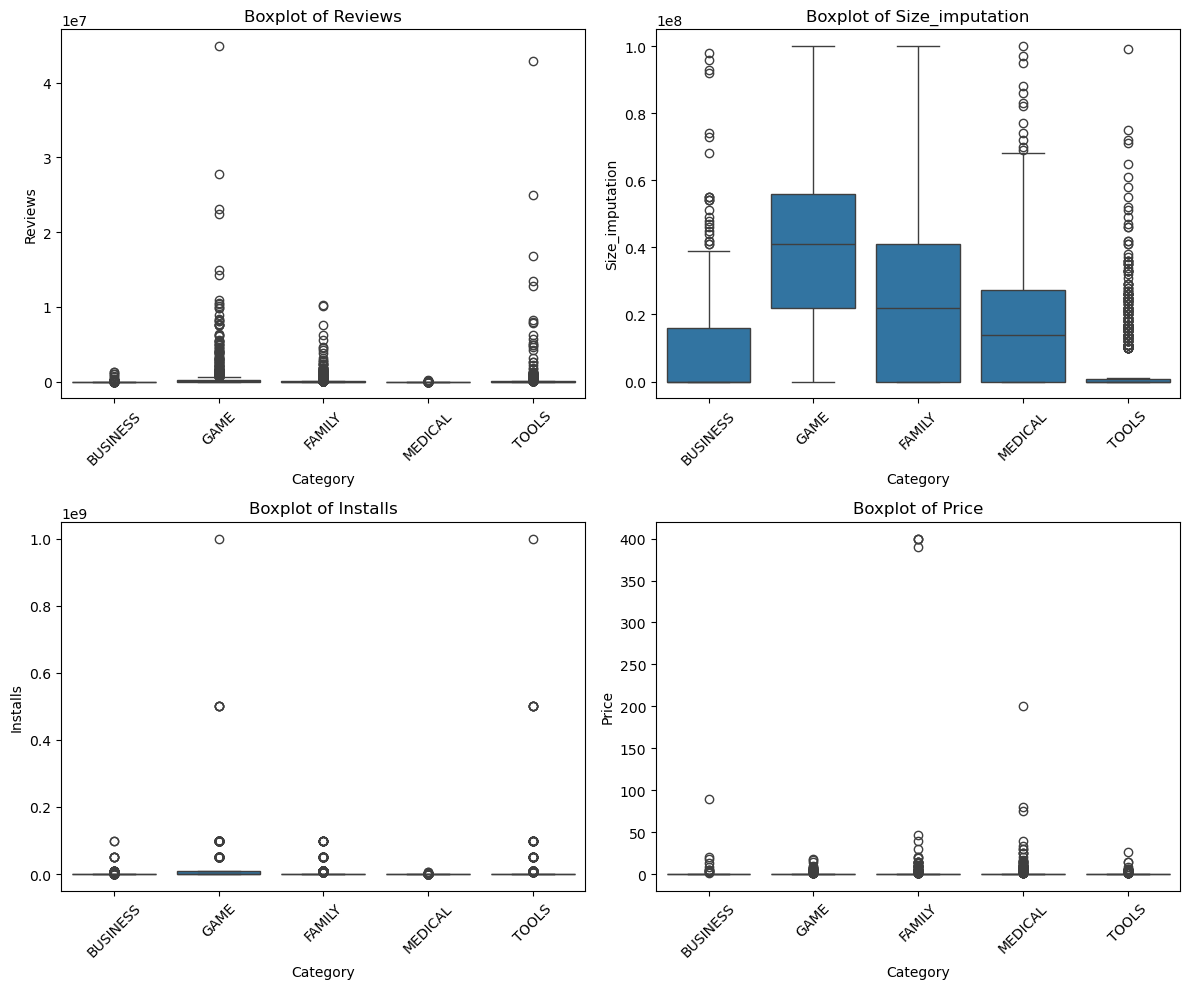

In [377]:
# Building boxplot for each feature per category
n_cols = 2
n_rows = (len(out_distribution) + 1) // n_cols  

fig, axes = plt.subplots(n_rows, n_cols, figsize=(12, 5 * n_rows))
axes = axes.flatten()  

for i, col in enumerate(out_distribution):
    print('-----------------------------------')
    print(f"\033[91mSkew of top 5 categories in {col}:\033[0m\n")

    for cat in top_categories_index:
        skew_value = df_copy[df_copy['Category'] == cat][col].skew()
        print(f"{cat}: {round(skew_value, 2)}")

    sns.boxplot(
        data=df_copy[df_copy['Category'].isin(top_categories_index)],
        x='Category',
        y=col,
        ax=axes[i]
    )
    axes[i].set_title(f"Boxplot of {col}")
    axes[i].tick_params(axis='x', rotation=45)


for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

In [379]:
df_copy.head(2)

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,...,Android Ver,Date,Month,Year,Major,Minor,Patch,Size_original,Rating_missing,Size_imputation
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159.0,19000000.0,10000,Free,0.0,Everyone,Art & Design,...,4.0.3 and up,7,1,2018,100,NaN,NaN,19M,0,19000000.0
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510.0,8.7,5000000,Free,0.0,Everyone,Art & Design,...,4.0.3 and up,1,8,2018,124,NaN,NaN,8.7M,0,8.7


### Observation – Outliers per Category per Feature
After calculating the number of outliers and their percentage relative to the total number of records per category, we can draw the following insights:

- **Reviews:** Although the IQR method flags up to 22% of values as potential outliers in some categories, these are better interpreted as legitimate high-variance regions within a highly skewed distribution. Rather than errors, they likely reflect genuine user engagement patterns—especially in popular apps—and should be considered meaningful.
- **Size:** The FAMILY and GAME categories show a stable distribution with virtually no outliers, suggesting consistent app sizes within these groups. In contrast, TOOLS presents a higher number of outliers, likely due to the diverse functionality and complexity of apps in this category rather than data inconsistencies.
- **Installs:** This feature shows that apps in nearly every category can go viral. The presence of 21% and 25% outliers in TOOLS and MEDICAL, respectively, indicates that even niche categories may have apps with exceptionally high popularity.
- **Price:** Price shows fewer outliers compared to other features, confirming that app prices are generally stable and—consistent with earlier analysis—clustered around zero. The MEDICAL category is a notable exception, with a relatively high percentage of price outliers. This aligns with earlier findings suggesting that medical apps often serve niche, high-value use cases.

🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷
🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷
## 5. Univariate Analysis of Numeric Features

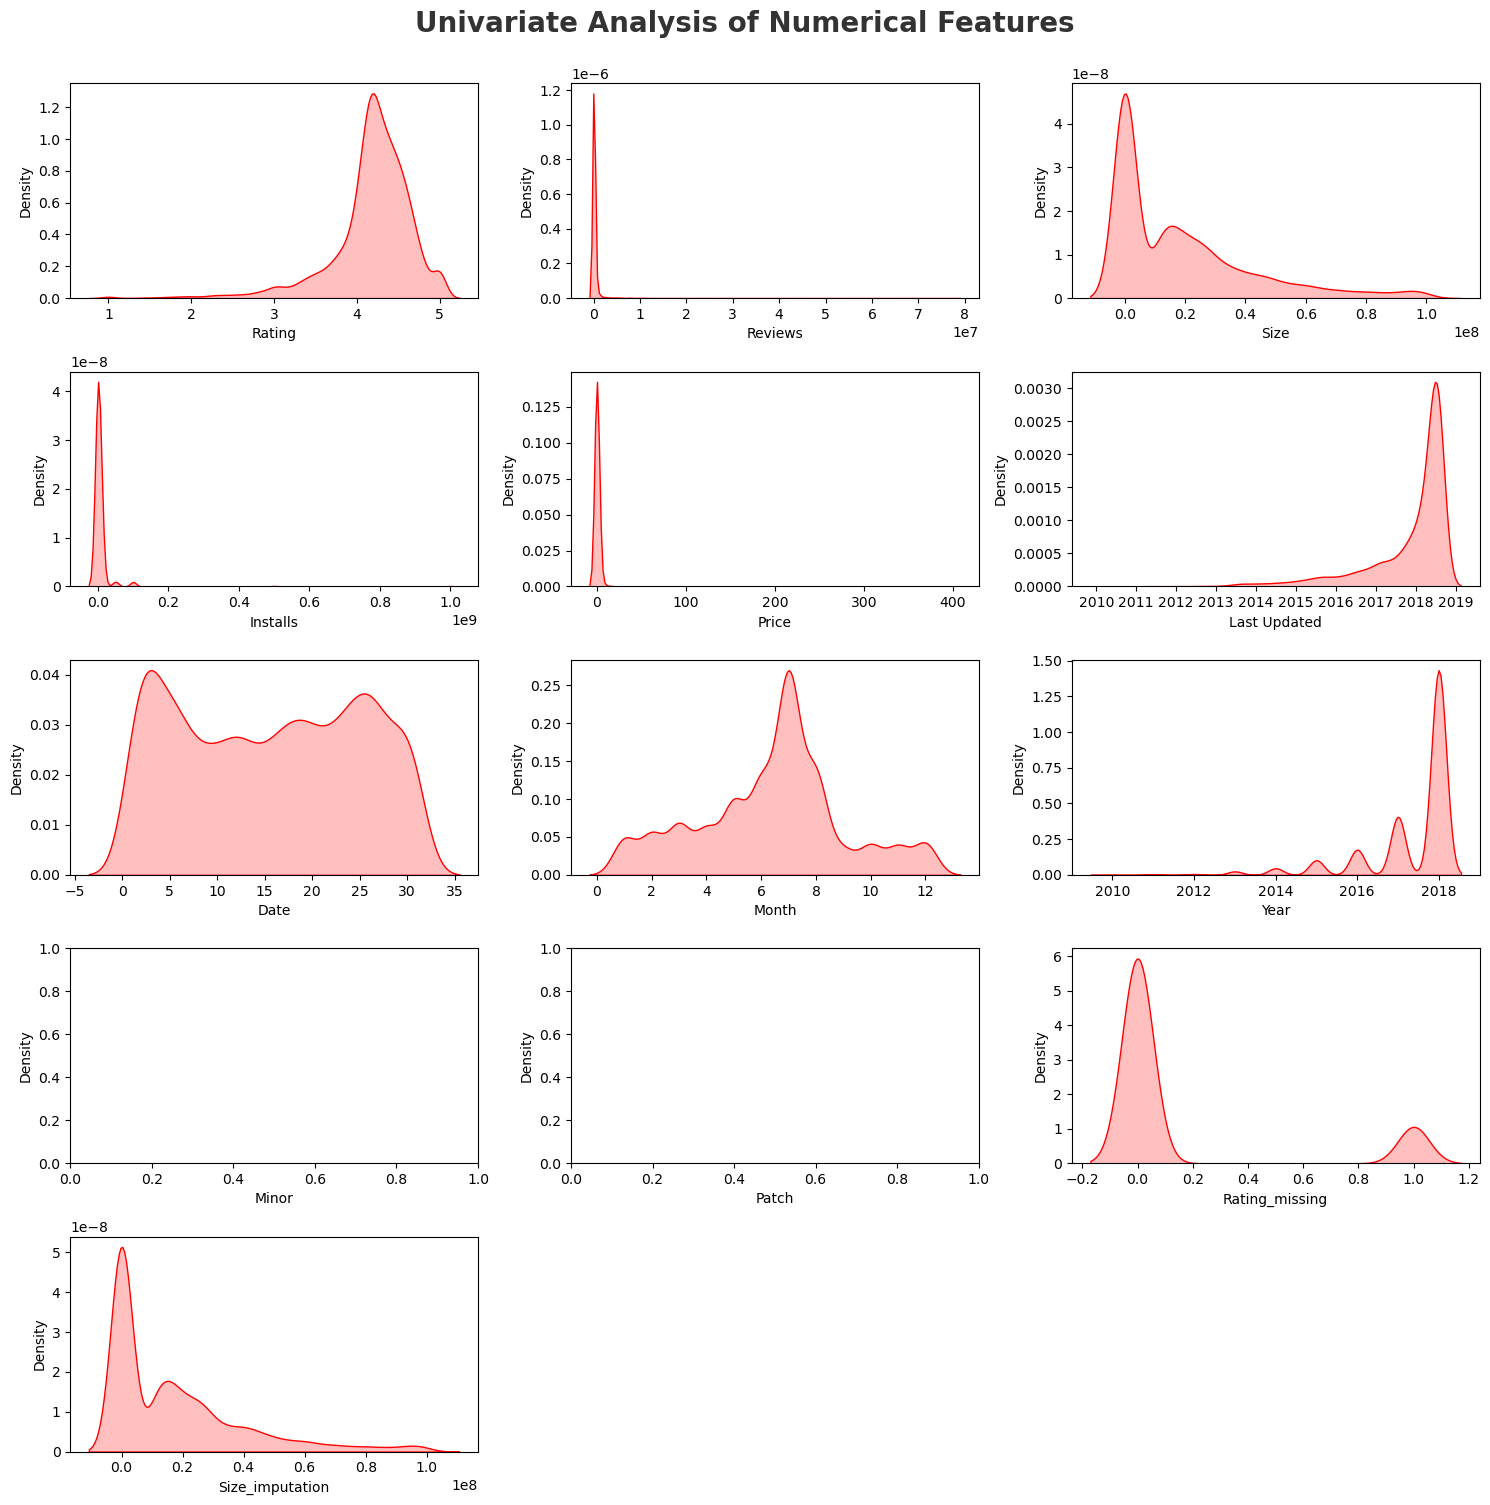

In [383]:
plt.figure(figsize = (15,15))
plt.suptitle('Univariate Analysis of Numerical Features', fontsize = 20, fontweight = 'bold', alpha = 0.8, y = 1.)

for i in range(0, len(numeric_feature)):
    plt.subplot(5, 3, i+1)
    sns.kdeplot(x=df_copy[numeric_feature[i]], shade = True, color = 'r')
    plt.xlabel(numeric_feature[i])
    plt.tight_layout()
plt.show()

In [384]:
df_copy.info()

<class 'pandas.core.frame.DataFrame'>
Index: 9683 entries, 0 to 10502
Data columns (total 22 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   App              9683 non-null   object        
 1   Category         9683 non-null   object        
 2   Rating           9683 non-null   float64       
 3   Reviews          9683 non-null   float64       
 4   Size             8452 non-null   float64       
 5   Installs         9683 non-null   int64         
 6   Type             9683 non-null   object        
 7   Price            9683 non-null   float64       
 8   Content Rating   9683 non-null   object        
 9   Genres           9683 non-null   object        
 10  Last Updated     9683 non-null   datetime64[ns]
 11  Current Ver      9683 non-null   object        
 12  Android Ver      9683 non-null   object        
 13  Date             9683 non-null   int32         
 14  Month            9683 non-null   int32      

🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷

In [388]:
df_copy['Rating'].describe()

count    9683.000000
mean        4.173168
std         0.495178
min         1.000000
25%         4.000000
50%         4.200000
75%         4.500000
max         5.000000
Name: Rating, dtype: float64

In [390]:
df_copy[['Rating']].mode()

,Rating
0,4.3


🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷

In [393]:
df_copy[['Size']].describe()

,Size
count,8.452000e+03
mean,1.841282e+07
std,2.330497e+07
min,1.000000e+00
25%,5.300000e+00
50%,1.200000e+07
75%,2.800000e+07
max,1.000000e+08


In [395]:
df_copy[['Size']].mode()

,Size
0,12000000.0


🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷

In [398]:
df_copy['Installs'].describe()

count    9.683000e+03
mean     7.841234e+06
std      5.373758e+07
min      0.000000e+00
25%      1.000000e+03
50%      1.000000e+05
75%      1.000000e+06
max      1.000000e+09
Name: Installs, dtype: float64

In [400]:
df_copy[['Installs']].mode()

,Installs
0,1000000


🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷

In [403]:
df_copy[['Year', 'Month']].min()

Year     2010
Month       1
dtype: int32

In [405]:
df_copy[['Last Updated']].describe()

,Last Updated
count,9683
mean,2017-10-31 14:14:30.721883648
min,2010-05-21 00:00:00
25%,2017-08-09 00:00:00
50%,2018-05-06 00:00:00
75%,2018-07-17 00:00:00
max,2018-08-08 00:00:00


In [407]:
df_copy[['Last Updated']].describe()

,Last Updated
count,9683
mean,2017-10-31 14:14:30.721883648
min,2010-05-21 00:00:00
25%,2017-08-09 00:00:00
50%,2018-05-06 00:00:00
75%,2018-07-17 00:00:00
max,2018-08-08 00:00:00


In [409]:
df_copy[['Last Updated']].mode()

,Last Updated
0,2018-08-03


In [411]:
df_copy['Last Updated'].value_counts().max()

252

In [413]:
mod = df_copy['Last Updated'].mode()[0]
df_copy['Last Updated'].value_counts()[mod]

252

### Observations
1. **Rating:** right skewed, meaning that, in general, there are more positive ratings than negative with the most ratings being around 4.3. the median being 4.3 confirms the presence of more positive ratings: if 50% of the ratings are higher or equal than 4.3, it means that 50% of the data are between 4.3 and 5 (which clearly is a shorter range than 0 to 4.3).
2. **Reviews:** the count of Reviews doesn't really make much sense since the data in this category is already a count: the number of reviews is hardly the same across multiple apps, there counting how many reviews are the same is, not only not useful, but also conceptually wrong. the best approach here would be to understand what app, genre, maybe compared to number of downloads or to devices, has the biggest number of reviews
3. **Size:** left skewed, meaning that most apps have a smaller size and the most frequent value here (mode since it's a skewed distribution) is 11000000.0 bytes or 11 MB. This is also confirmed by the median = 12 MB, which is closer to the max = 100 MB than to the min =  0.00000095 MB.
4. **Installs:** similarly to Reviews, this is already a count per app, so counting the single value of this feature is a count of count. It would be better instead to analyze these numbers next to the specific app, the category of the app, in a timeframe and/or per type of device
5. **Price:** distribution is right skewed, which tells us that most of the prices for apps is little. The mode = 0 also confirms that most apps are free and just a couple above 350
6. **Last Updated:** the count of this feature tells us that most apps where update in 2018, which is also the year of the series. This is probably consistent with the incremental access to smart phones and, consequently, the usage of apps. The 5-numbers sumary and the shape (left skewed) of the ditribution for this variable seem to be in line with this hypothesis: in fact 50% of the updates took place after 2018-05-03 with the majority of updates on 2018-08-03 (count of mode for 2018-08-03 = 252), which is almost at the end of the series.  
After splitting Last Updated in date, month and year, we can get a better zoom on this variable: the date appear to be somewhat constant with major peaks at the beginning (between the 1st and the 5th) and the end of the month (between the 25th and the 30th); the month(s) with most updates appears to be the 6th, the 7th and the 8th; the years appear to have peaks in 2016, 2017 and 2018, with the last one being extremely higher than the previous two.
We can also see that these last variables are mostly affected by the high number of updates in 2018, so previous years could have different date and month of most updates.

🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷

### Univariate Analysis of Categorical features

In [418]:
df_copy.info()

<class 'pandas.core.frame.DataFrame'>
Index: 9683 entries, 0 to 10502
Data columns (total 22 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   App              9683 non-null   object        
 1   Category         9683 non-null   object        
 2   Rating           9683 non-null   float64       
 3   Reviews          9683 non-null   float64       
 4   Size             8452 non-null   float64       
 5   Installs         9683 non-null   int64         
 6   Type             9683 non-null   object        
 7   Price            9683 non-null   float64       
 8   Content Rating   9683 non-null   object        
 9   Genres           9683 non-null   object        
 10  Last Updated     9683 non-null   datetime64[ns]
 11  Current Ver      9683 non-null   object        
 12  Android Ver      9683 non-null   object        
 13  Date             9683 non-null   int32         
 14  Month            9683 non-null   int32      

In [420]:
df_copy[df_copy['Type'].isnull()]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,...,Android Ver,Date,Month,Year,Major,Minor,Patch,Size_original,Rating_missing,Size_imputation


In [422]:
(df['Type'].map(type) == str).value_counts()

Type
True     10840
False        1
Name: count, dtype: int64

In [424]:
(df['Type'].map(type) == str).all()

False

In [426]:
df[df['Type'].map(type)!=str]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
9148,Command & Conquer: Rivals,FAMILY,NaN,0,Varies with device,0,NaN,0,Everyone 10+,Strategy,"June 28, 2018",Varies with device,Varies with device


In [428]:
df_copy.drop(df_copy.index[9148], inplace = True)

#or

df_copy=df_copy.drop(df_copy.index[9148])

In [430]:
(df_copy['Type'].map(type) == str).all()

True

In [432]:
df_copy['Type'].isnull().sum()

0

In [434]:
(df_copy['Type']=='Free').value_counts()

Type
True     8928
False     753
Name: count, dtype: int64

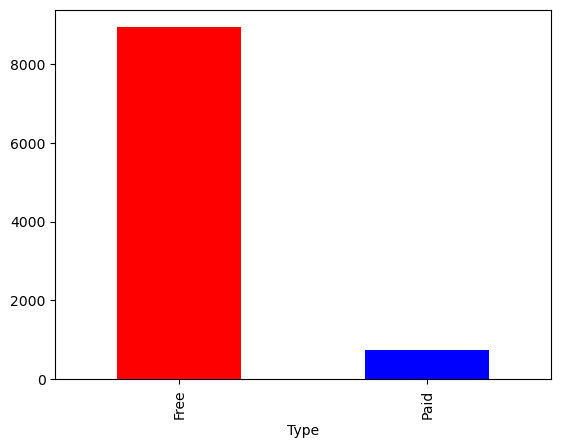

In [436]:
df_copy['Type'].value_counts().plot(kind = 'bar', color = ['red','blue'])
plt.show()

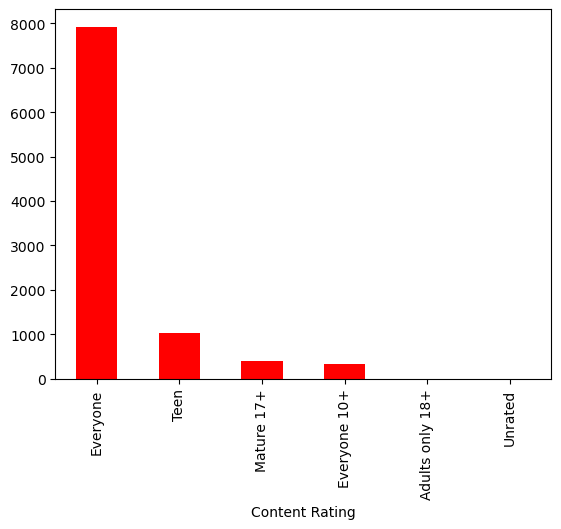

In [438]:
df_copy['Content Rating'].value_counts().plot(kind = 'bar', color = 'red')
plt.show()

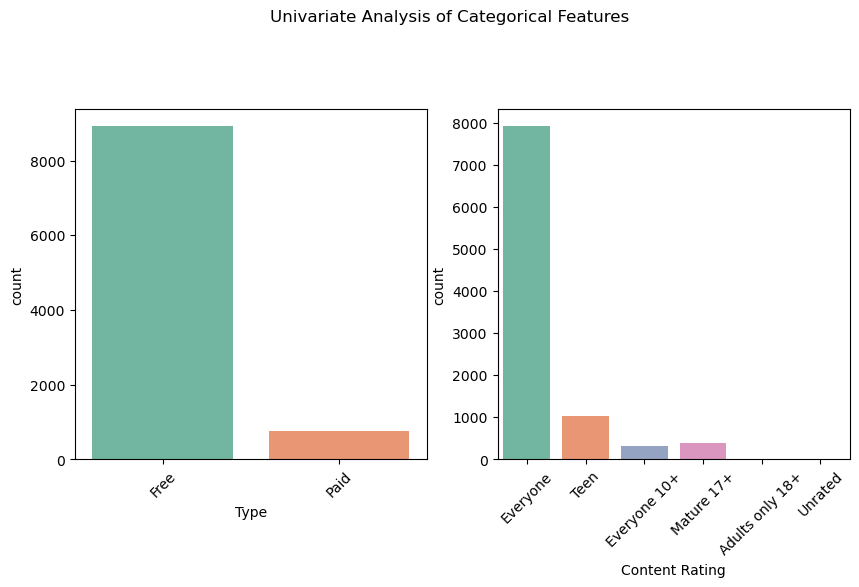

In [440]:
#let's merge together the previous two barplots in one plot
series = ['Type','Content Rating']

plt.figure(figsize = (10,10))
for i, col in enumerate(series):
    plt.subplot(2,2,i+1)
    sns.countplot(x = col, data = df_copy, palette = 'Set2')
    plt.xticks(rotation =45)

plt.suptitle('Univariate Analysis of Categorical Features')
plt.show()

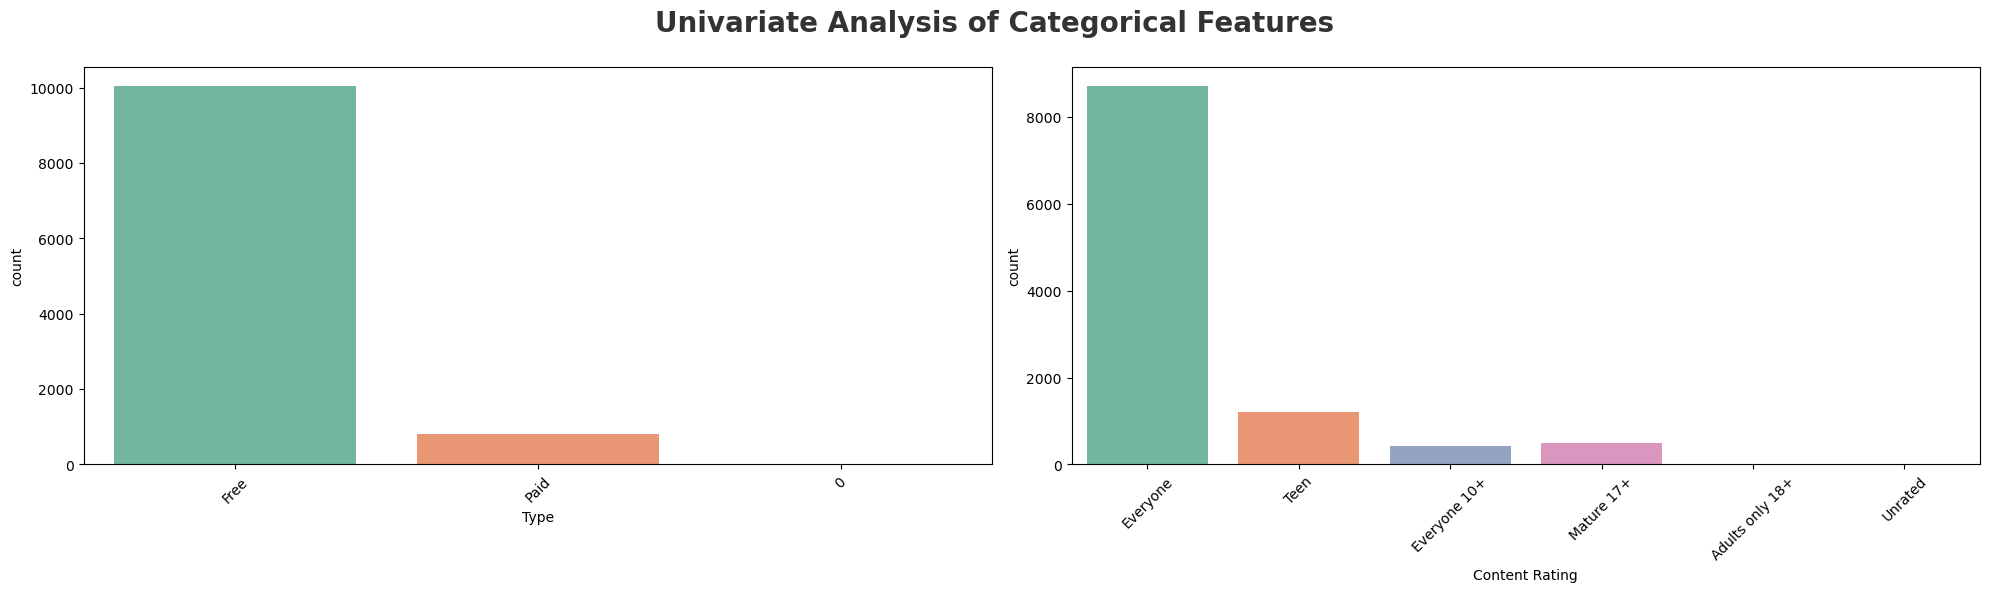

In [442]:
series = ['Type','Content Rating']

plt.figure(figsize = (20,10))

for col in range(0,len(series)):
    plt.subplot(2,2,col+1)
    sns.countplot(x = df[series[col]], palette = 'Set2')
    plt.xlabel(series[col])
    plt.xticks(rotation =45)

plt.suptitle('Univariate Analysis of Categorical Features', fontsize=20, fontweight='bold', alpha=0.8, y=1.)
plt.tight_layout()   
plt.show()

🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷
🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷
## 6. General Tasks
### What are the most common prices for apps

#### 1. Numerical version

In [447]:
df_copy[['Price']].describe()

,Price
count,9681.000000
mean,1.096443
std,16.833083
min,0.000000
25%,0.000000
50%,0.000000
75%,0.000000
max,400.000000


In [449]:
df_copy[['Price']].mode()

,Price
0,0.0


In [451]:
df_copy['Price'].info()

<class 'pandas.core.series.Series'>
Index: 9681 entries, 0 to 10502
Series name: Price
Non-Null Count  Dtype  
--------------  -----  
9681 non-null   float64
dtypes: float64(1)
memory usage: 151.3 KB


In [453]:
df_copy['Price'].unique()

array([  0.  ,   4.99,   3.99,   1.49,   2.99,   7.99,   3.49,   1.99,
         5.99,   6.99,   9.99,   7.49,   0.99,   9.  ,   5.49,  10.  ,
        11.99,  79.99,  16.99,  14.99,   1.  ,  29.99,   2.49,  24.99,
        10.99,   1.5 ,  19.99,  15.99,  33.99,  74.99,  39.99,   4.49,
         1.7 ,   8.99,   2.  ,   3.88,  25.99, 399.99,  17.99, 400.  ,
         3.02,   1.76,   4.84,   4.77,   1.61,   2.5 ,   1.59,   6.49,
         1.29,   5.  ,  13.99, 299.99, 379.99,  37.99,  18.99, 389.99,
        19.9 ,   8.49,   1.75,  14.  ,   4.85,  46.99, 109.99, 154.99,
         3.08,   2.59,   4.8 ,   1.96,  19.4 ,   3.9 ,   4.59,  15.46,
         3.04,  12.99,   4.29,   2.6 ,   3.28,   4.6 ,  28.99,   2.95,
         2.9 ,   1.97, 200.  ,  89.99,   2.56,  30.99,   3.61, 394.99,
         1.26,   1.2 ,   1.04,   3.95])

In [455]:
df_copy['Price'].value_counts().sort_index().head(10)

Price
0.00    8928
0.99     143
1.00       3
1.04       1
1.20       1
1.26       1
1.29       1
1.49      45
1.50       1
1.59       1
Name: count, dtype: int64

#### 2. Visual 

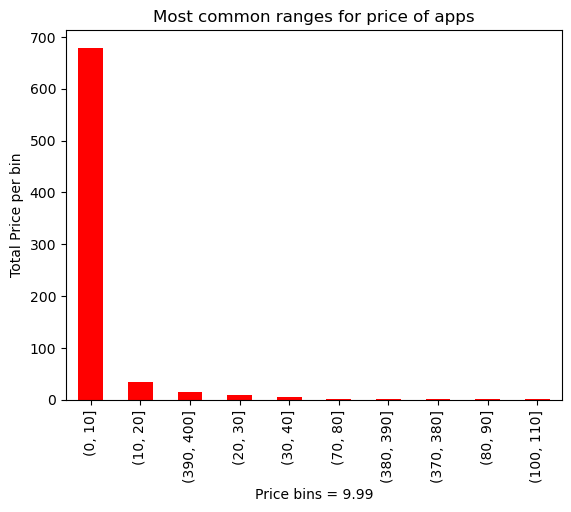

In [458]:
bins = range(0, 401, 10)

df_copy['Price_bins'] = pd.cut(df_copy['Price'], bins = bins)
df_copy['Price_bins'].value_counts().sort_index().sort_values(ascending = False).head(10).plot(kind = 'bar', color='red')

plt.xlabel('Price bins = 9.99')
plt.ylabel('Total Price per bin') 
plt.title('Most common ranges for price of apps')
plt.show()

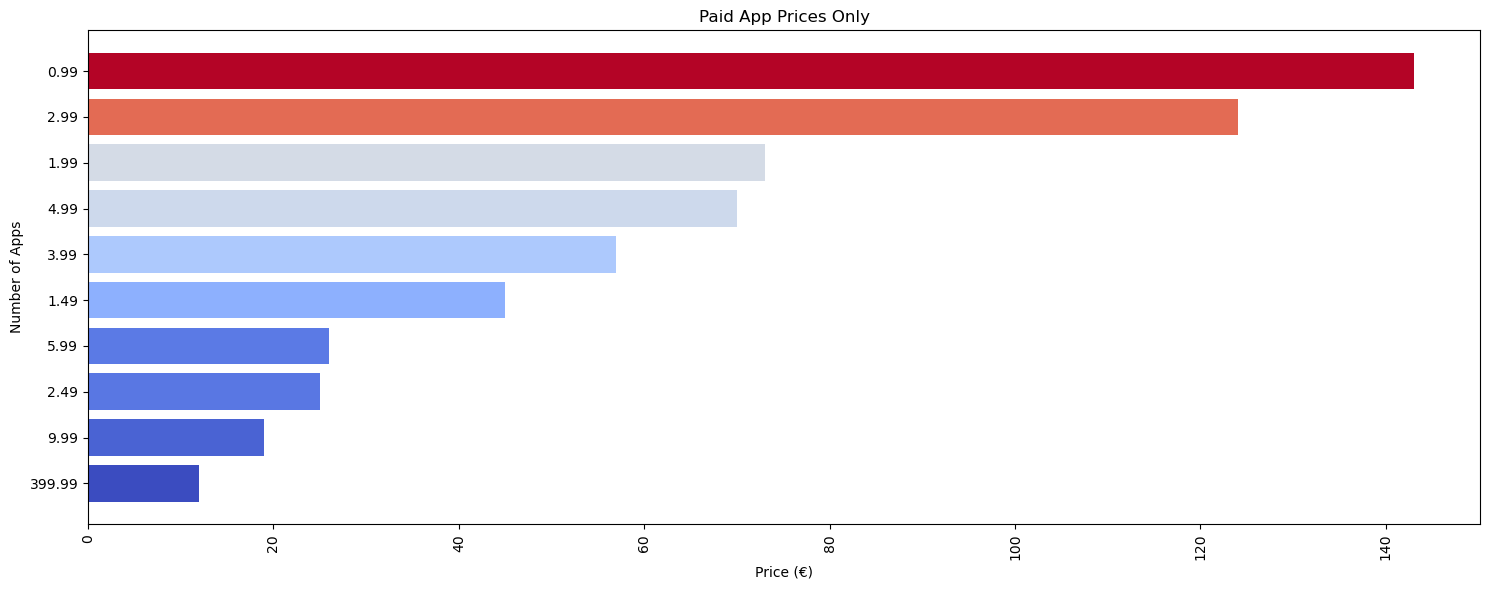

In [460]:
paid_prices = df_copy[df_copy['Price'] > 0]
categories = paid_prices['Price'].value_counts().sort_index()
categories = categories.sort_values(ascending = False).head(10)
categories = categories.sort_values()
categories.index = categories.index.astype(str) 

plt.figure(figsize=(15, 6))
norm = plt.Normalize(categories.min(), categories.max())
colors = cm.coolwarm(norm(categories)) 
plt.barh(categories.index,categories.values, color = colors)
plt.title('Paid App Prices Only')
plt.xlabel('Price (€)')
plt.ylabel('Number of Apps')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()


Since the categories are numerical, matplotlib will consider them as continuos. In fact, many values are very close to each other (0.99, 1.0, 10.4) and the consequence is that they will be displayed as a uniqum and not as single categories.  
In order to avoid this problem we need to convert this numbers to categories that Python can recognise as such, this is why we converted them to str with the line:
<span style="color:red">categories.index = categories.index.astype(str).</span> 

This conversion is often needed, especially when:
- Your x-axis values are numeric (like prices or years),
- But you want to treat them as categories (like unique price points),
- And you want a clean bar chart without merging or compression.

🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷

#### Most present apps in google playstore

#### 1. Numerical version

In [466]:
df_copy[['Category']].value_counts().sort_values(ascending = False).head(10).reset_index(name = 'Count')

,Category,Count
0,FAMILY,1857
1,GAME,952
2,TOOLS,828
3,BUSINESS,420
4,MEDICAL,400
5,PRODUCTIVITY,375
6,PERSONALIZATION,374
7,LIFESTYLE,369
8,FINANCE,345
9,SPORTS,325


In [468]:
df_copy[['Category']].mode()

,Category
0,FAMILY


In [470]:
df_copy[['Category']].value_counts().max()

1857

#### 2. Visual 

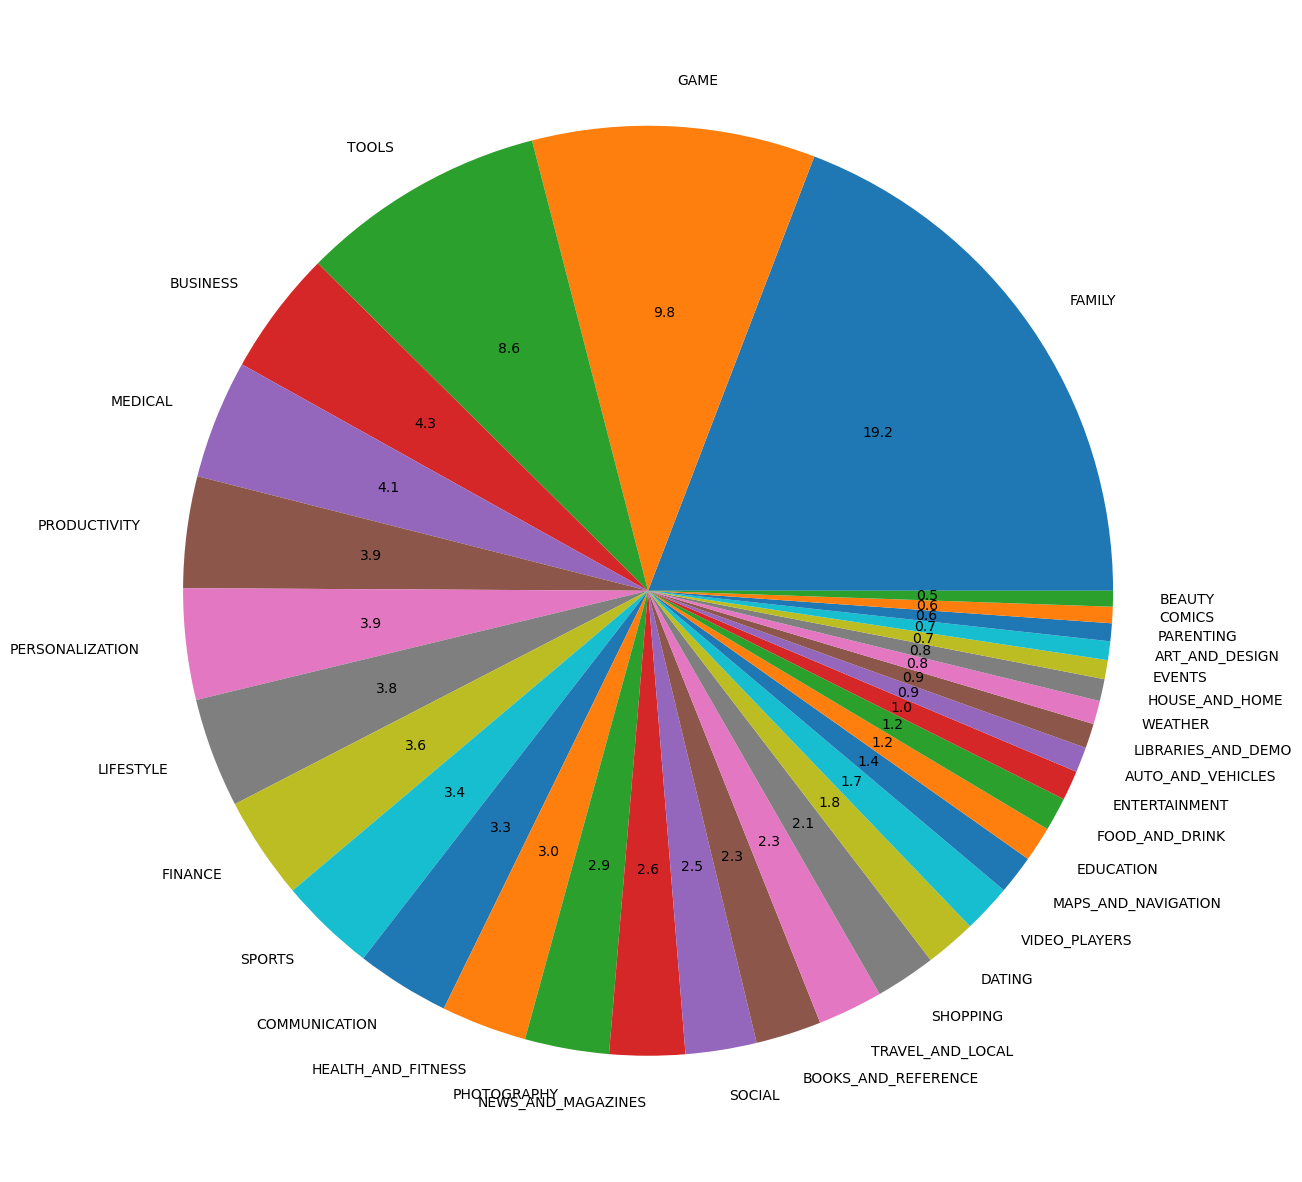

In [473]:
top_category = df_copy['Category'].value_counts()

plt.figure(figsize = (15,16))
plt.pie(top_category.values, labels=top_category.index,autopct='%1.1f')
plt.show()

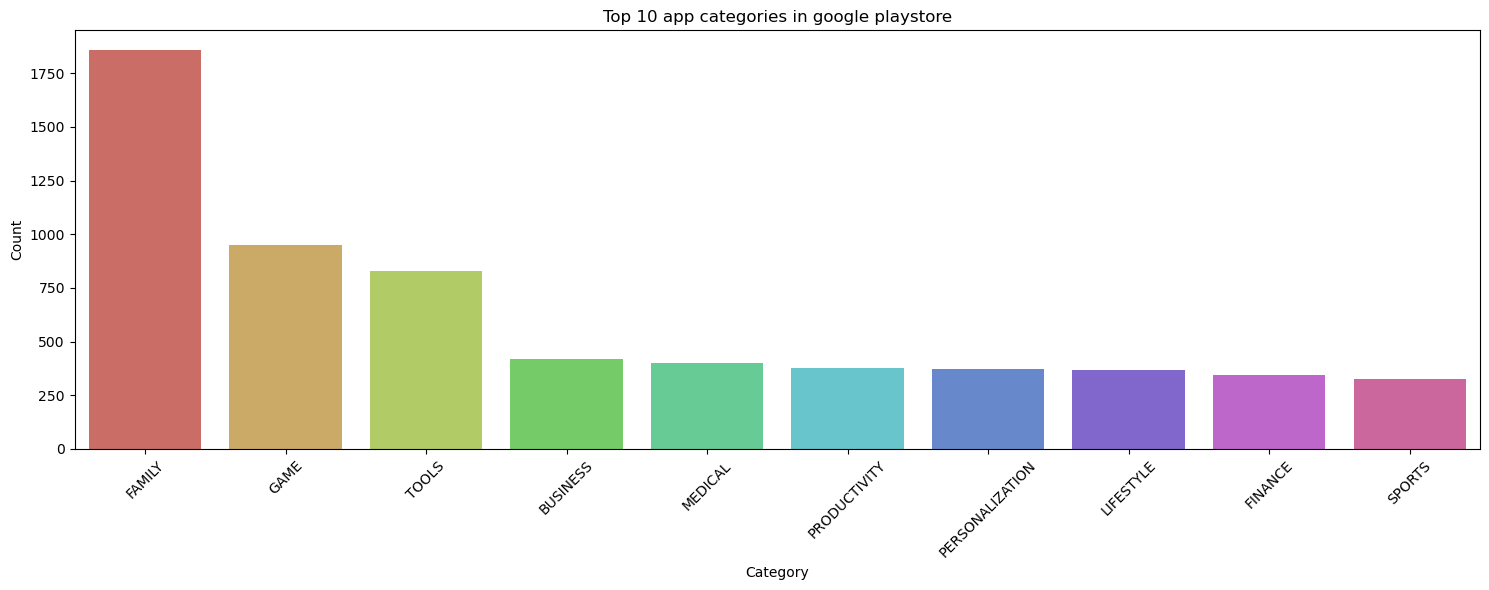

In [475]:
top_category = pd.DataFrame(df_copy['Category'].value_counts().reset_index())
top_category.columns = ['Category', 'Count'] 

plt.figure(figsize = (15,6))
sns.barplot(x='Category', y = 'Count', data = top_category[:10], palette = 'hls')
plt.xticks(rotation = 45)
plt.title('Top 10 app categories in google playstore')
# plt.xlabel('')
# plt.ylabel('Count of category')
plt.tight_layout()
plt.show()

🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷

### Which category has the largest number of installs?

#### 1. Numerical version

In [480]:
top_category_df = pd.DataFrame(df_copy.groupby('Category')['Installs'].sum())
top_category_df.sort_values('Installs', ascending = False)

,Installs
Category,
GAME,13792924415
COMMUNICATION,10039276251
TOOLS,8112271905
PRODUCTIVITY,5803091369
SOCIAL,5487867902
FAMILY,5278981405
PHOTOGRAPHY,4669147655
VIDEO_PLAYERS,3922002720
TRAVEL_AND_LOCAL,2894887146


In [482]:
top_category_df = pd.DataFrame(df_copy.groupby('Category')['Installs'].sum().sort_values(ascending =False).head(5))
top_category_df

,Installs
Category,
GAME,13792924415
COMMUNICATION,10039276251
TOOLS,8112271905
PRODUCTIVITY,5803091369
SOCIAL,5487867902


In [484]:
df_copy.groupby('Category')['Installs'].sum().sort_values( ascending = False).to_frame().head(1)

,Installs
Category,
GAME,13792924415


🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷

#### 2. Visualization

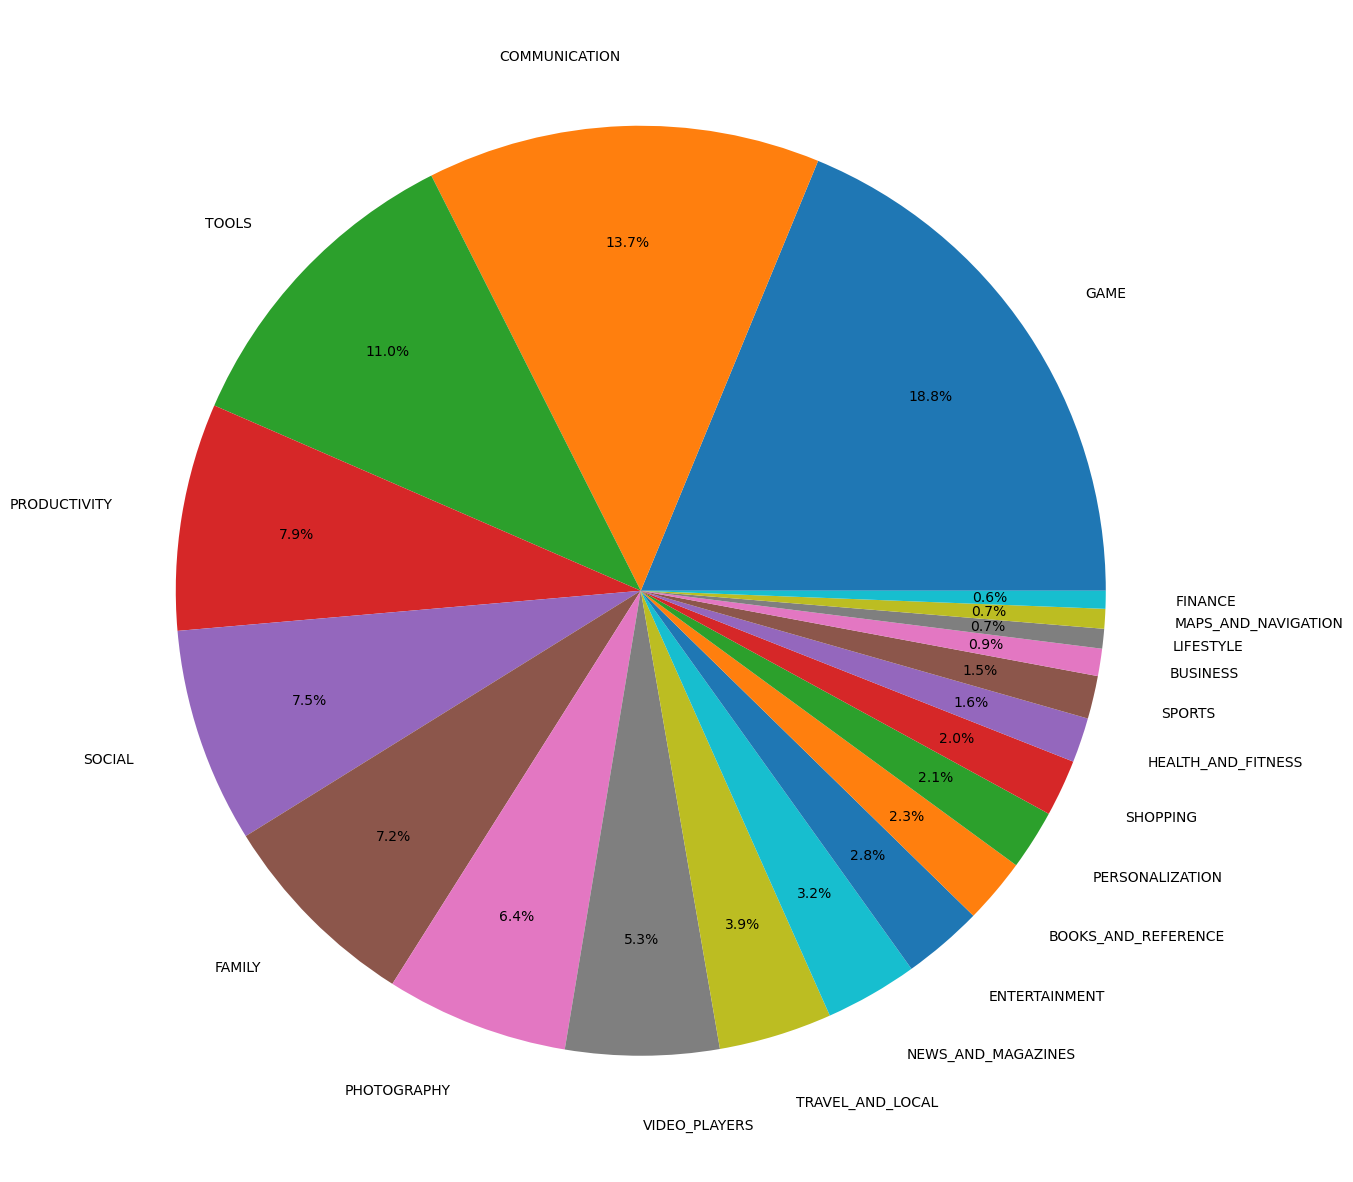

In [488]:
top_installs = df_copy.groupby('Category')['Installs'].sum().sort_values(ascending = False).head(20)


plt.figure(figsize=(15,16))
plt.pie(top_installs.values, labels = top_installs.index,autopct = "%1.1f%%",
        labeldistance=1.15,
        pctdistance=0.75)

plt.show()

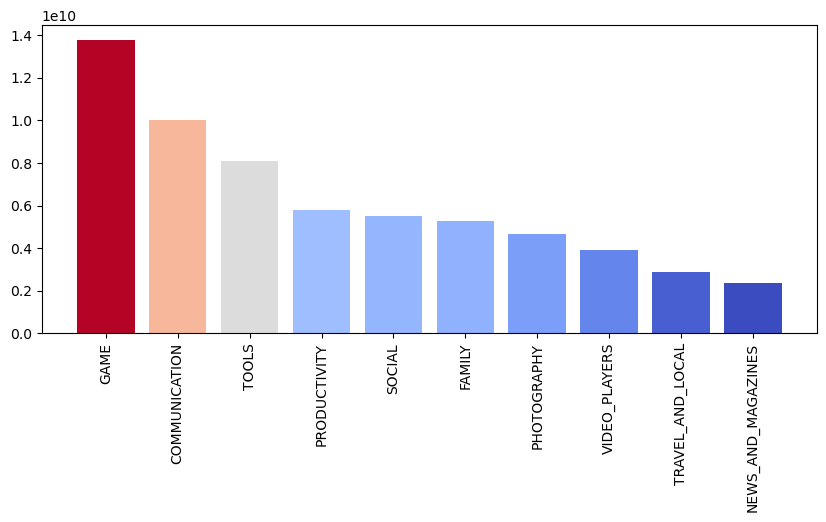

In [490]:
installs = df_copy.groupby('Category')['Installs'].sum().sort_values(ascending = False).head(10)



norm = plt.Normalize(installs.min(), installs.max())
colors = cm.coolwarm(norm(installs)) 
plt.figure(figsize = (10,4))
plt.bar(installs.index, installs.values, color=colors)
plt.xticks(rotation=90)

plt.show()

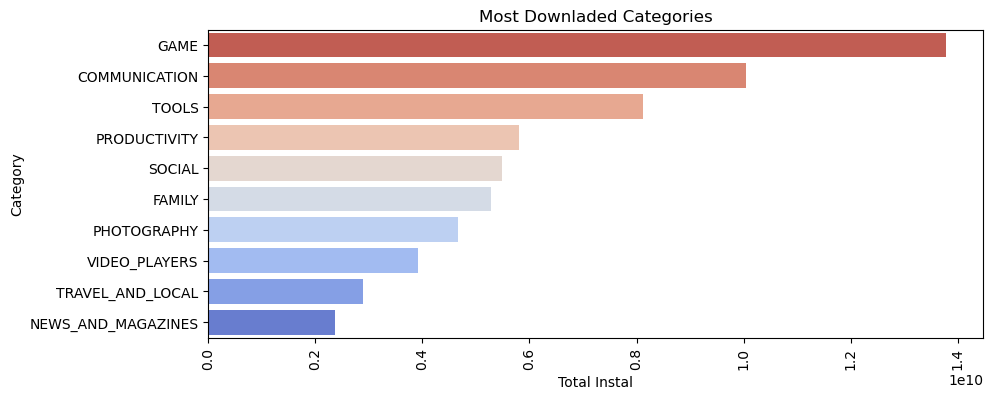

In [492]:
installs = df_copy.groupby('Category')['Installs'].sum().sort_values(ascending = False).reset_index()
install_sorted = installs.head(10)

palette = sns.color_palette('coolwarm', len(install_sorted))[::-1]
plt.figure(figsize = (10,4))
sns.barplot(x='Installs', y='Category', data = install_sorted, palette = palette)
plt.xticks(rotation=90)
plt.xlabel('Total Instal')
plt.ylabel('Category')
plt.title('Most Downladed Categories')
plt.show()

🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷

### What are the top 5 most installed apps in each popular category?

#### 1. Numerical version

In [497]:

top_categories = ['GAME', 'COMMUNICATION', 'PRODUCTIVITY', 'SOCIAL' ]

top_apps = {}

for item in top_categories:
    top_apps[item] = df_copy[df_copy['Category']==item].groupby(['App'])['Installs'].sum().sort_values(ascending=False).head(5)




df_top_apps = pd.concat(top_apps).reset_index()
df_top_apps.columns = ['Category', 'App', 'Installs']
df_top_apps

,Category,App,Installs
0,GAME,Subway Surfers,1000000000
1,GAME,Candy Crush Saga,500000000
2,GAME,Temple Run 2,500000000
3,GAME,Pou,500000000
4,GAME,My Talking Tom,500000000
5,COMMUNICATION,WhatsApp Messenger,1000000000
6,COMMUNICATION,Hangouts,1000000000
7,COMMUNICATION,Skype - free IM & video calls,1000000000
8,COMMUNICATION,Gmail,1000000000
9,COMMUNICATION,Google Chrome: Fast & Secure,1000000000


In [499]:
top_category = ['GAME', 'COMMUNICATION', 'PRODUCTIVITY', 'SOCIAL' ]
dfa = df_copy.groupby(['Category','App'])['Installs'].sum().reset_index()
dfa = dfa.sort_values('Installs', ascending = False)
top_apps=[]

for item in top_category:
    df2 = dfa[dfa['Category'] == item]
    df3 = df2.head(5)
    top_apps.append(df3)

top_apps_df = pd.concat(top_apps, ignore_index=True)
top_apps_df

,Category,App,Installs
0,GAME,Subway Surfers,1000000000
1,GAME,Temple Run 2,500000000
2,GAME,Candy Crush Saga,500000000
3,GAME,Pou,500000000
4,GAME,My Talking Tom,500000000
5,COMMUNICATION,WhatsApp Messenger,1000000000
6,COMMUNICATION,Hangouts,1000000000
7,COMMUNICATION,Skype - free IM & video calls,1000000000
8,COMMUNICATION,Gmail,1000000000
9,COMMUNICATION,Google Chrome: Fast & Secure,1000000000


In [501]:
df_copy.info()

<class 'pandas.core.frame.DataFrame'>
Index: 9681 entries, 0 to 10502
Data columns (total 23 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   App              9681 non-null   object        
 1   Category         9681 non-null   object        
 2   Rating           9681 non-null   float64       
 3   Reviews          9681 non-null   float64       
 4   Size             8451 non-null   float64       
 5   Installs         9681 non-null   int64         
 6   Type             9681 non-null   object        
 7   Price            9681 non-null   float64       
 8   Content Rating   9681 non-null   object        
 9   Genres           9681 non-null   object        
 10  Last Updated     9681 non-null   datetime64[ns]
 11  Current Ver      9681 non-null   object        
 12  Android Ver      9681 non-null   object        
 13  Date             9681 non-null   int32         
 14  Month            9681 non-null   int32      

#### 2 Visualization

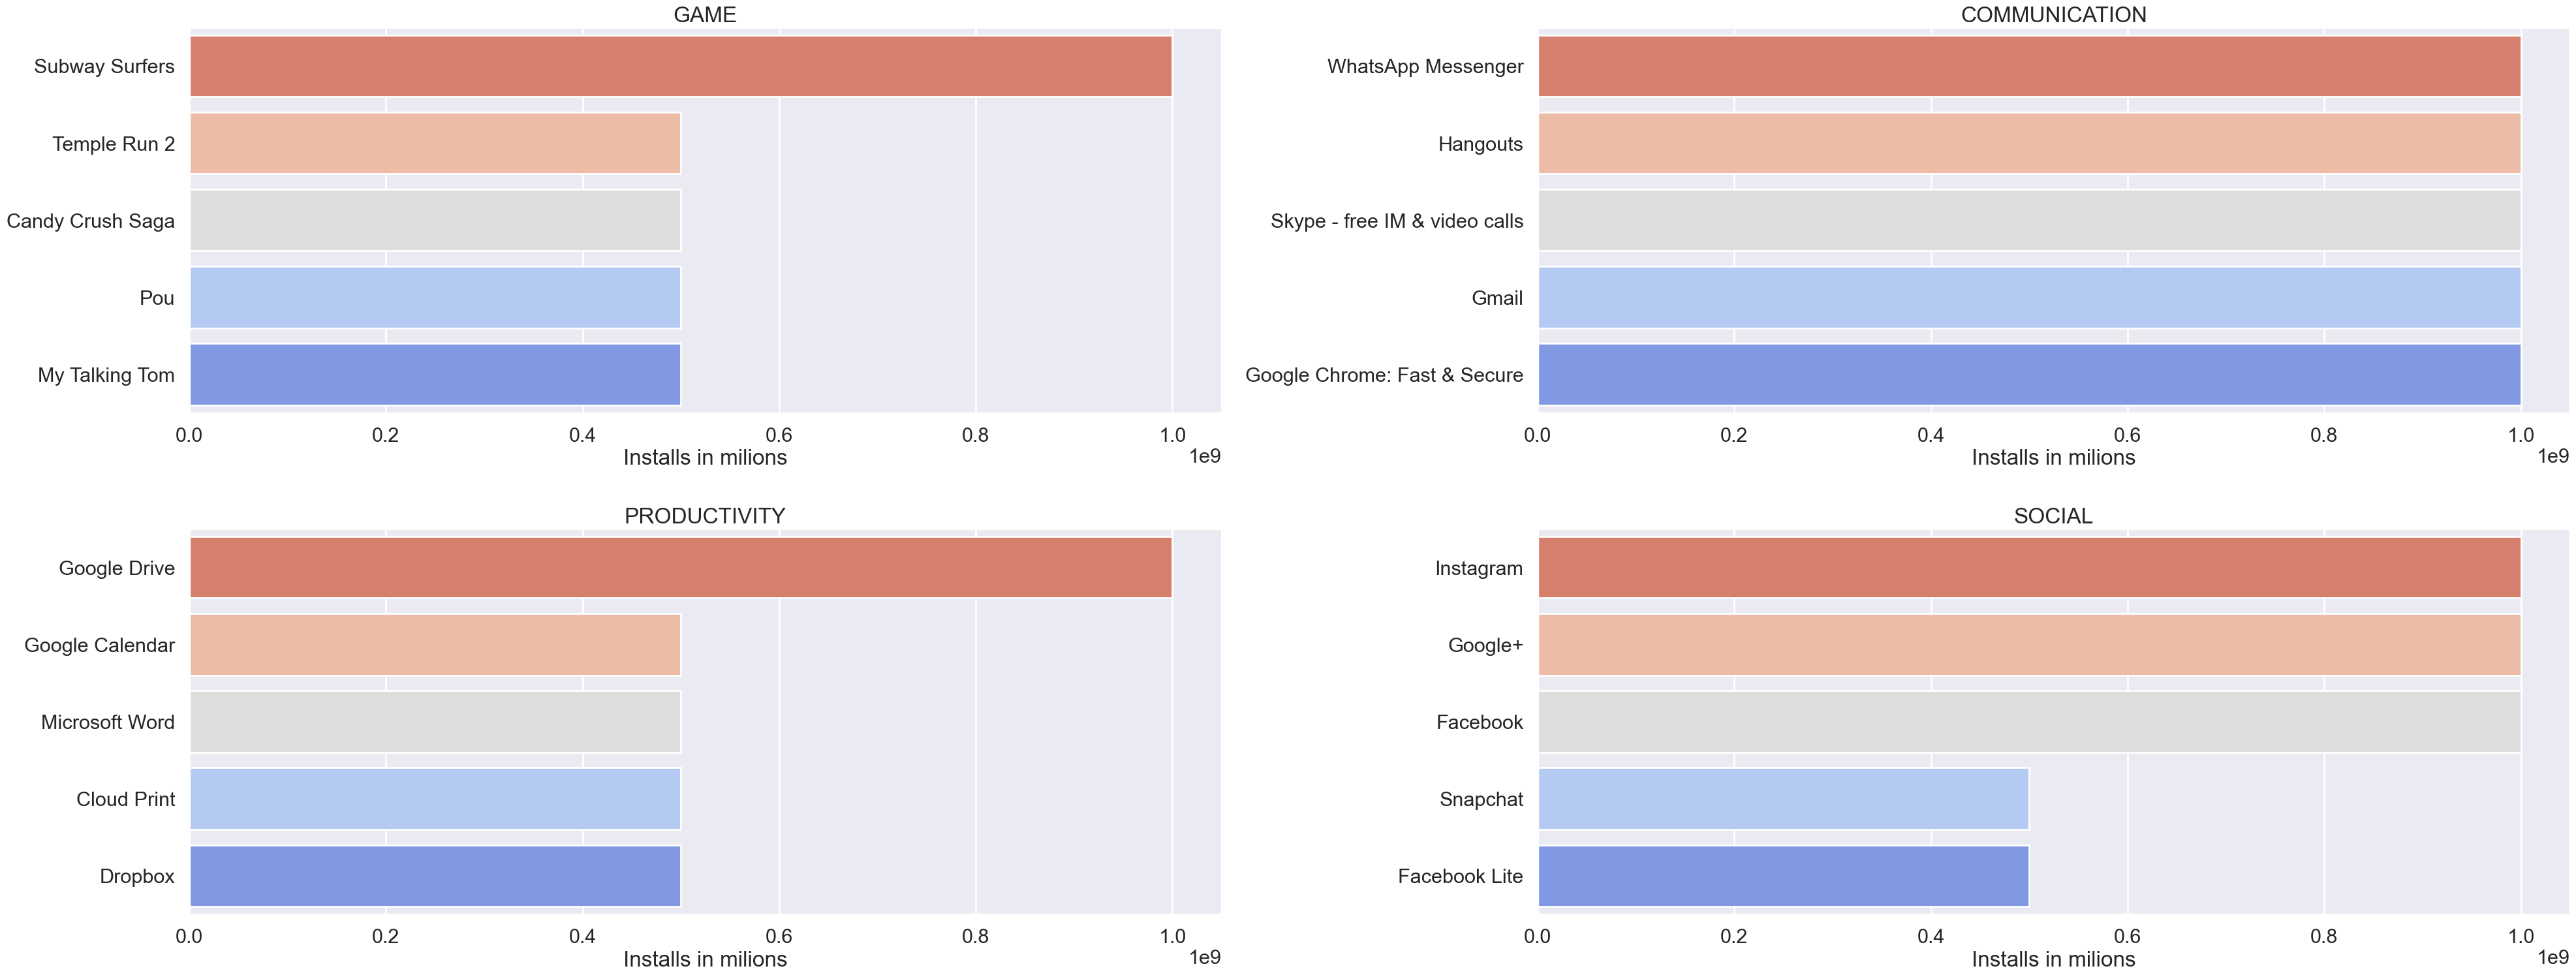

In [514]:
top_category = ['GAME', 'COMMUNICATION', 'PRODUCTIVITY', 'SOCIAL' ]
dfa = df_copy.groupby(['Category','App'])['Installs'].sum().reset_index()
dfa = dfa.sort_values('Installs', ascending = False)
sns.set_context("poster")
sns.set_style("darkgrid")

plt.figure(figsize = (40,30))

for i,item in enumerate(top_category):
    df2 = dfa[dfa['Category'] == item]
    df3 = df2.head(5)
    ax = plt.subplot(4,2,i+1)
    sns.barplot(df3, x='Installs', y='App', palette = 'coolwarm_r')
    plt.xlabel('Installs in milions')
    plt.ylabel('')
    ax.set_title(item)

  


plt.tight_layout()
plt.subplots_adjust(hspace= .3)
plt.show()

### How many apps are on google playstore that get 5 ratings?

Let's start by making sure that every app has only one rating

In [518]:
df[['App','Rating']]

,App,Rating
0,Photo Editor & Candy Camera & Grid & ScrapBook,4.1
1,Coloring book moana,3.9
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",4.7
3,Sketch - Draw & Paint,4.5
4,Pixel Draw - Number Art Coloring Book,4.3
...,...,...
10836,Sya9a Maroc - FR,4.5
10837,Fr. Mike Schmitz Audio Teachings,5.0
10838,Parkinson Exercices FR,NaN
10839,The SCP Foundation DB fr nn5n,4.5


When can make sure that every app has only one rating by making sure that the total number of unique app is the same number of total rows for app.

In [521]:
df_copy['App'].nunique()

9681

In [523]:
df_copy['App'].shape[0]

9681

🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷

#### 1. Numerical version

In [527]:
(df_copy['Rating'] == 5).sum()

271

In [529]:
df_copy['Rating'].value_counts().sort_index(ascending = False).head(1)


Rating
5.0    271
Name: count, dtype: int64

🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷

In [532]:
my_dict = {x: x**2 for x in range(1,11)}
print(my_dict)

###
#Inverrting keys and values from an existinf dictionary
new_dict = {my_dict[key]:key for key in my_dict} 
print(new_dict)


{1: 1, 2: 4, 3: 9, 4: 16, 5: 25, 6: 36, 7: 49, 8: 64, 9: 81, 10: 100}
{1: 1, 4: 2, 9: 3, 16: 4, 25: 5, 36: 6, 49: 7, 64: 8, 81: 9, 100: 10}
